# Importing Libraries And Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('conjura_mmm_data.csv')
df.head()

MMM_TIMESERIES_ID                   ORGANISATION_ID ORGANISATION_VERTICAL ORGANISATION_SUBVERTICAL ORGANISATION_MARKETING_SOURCES ORGANISATION_PRIMARY_TERRITORY_NAME   TERRITORY_NAME    DATE_DAY CURRENCY_CODE  FIRST_PURCHASES  FIRST_PURCHASES_UNITS  FIRST_PURCHASES_ORIGINAL_PRICE  FIRST_PURCHASES_GROSS_DISCOUNT  ALL_PURCHASES  ALL_PURCHASES_UNITS  ALL_PURCHASES_ORIGINAL_PRICE  ALL_PURCHASES_GROSS_DISCOUNT  GOOGLE_PAID_SEARCH_SPEND  GOOGLE_SHOPPING_SPEND  GOOGLE_PMAX_SPEND  GOOGLE_DISPLAY_SPEND  GOOGLE_VIDEO_SPEND  META_FACEBOOK_SPEND  META_INSTAGRAM_SPEND  META_OTHER_SPEND  TIKTOK_SPEND  GOOGLE_PAID_SEARCH_CLICKS  GOOGLE_SHOPPING_CLICKS  GOOGLE_PMAX_CLICKS  GOOGLE_DISPLAY_CLICKS  GOOGLE_VIDEO_CLICKS  META_FACEBOOK_CLICKS  META_INSTAGRAM_CLICKS  META_OTHER_CLICKS  TIKTOK_CLICKS  GOOGLE_PAID_SEARCH_IMPRESSIONS  GOOGLE_SHOPPING_IMPRESSIONS  GOOGLE_PMAX_IMPRESSIONS  GOOGLE_DISPLAY_IMPRESSIONS  GOOGLE_VIDEO_IMPRESSIONS  META_FACEBOOK_IMPRESSIONS  \
0  596eef7c71f933d820d0e485935d0e8f  04769dac8b828ec7a85676d9e2bffe6f      Beauty & Fitness                Hair Care                   Google, Meta                                  US  All Territories  2022-07-29           USD               22                     27                     3837.980834                      632.595555             27                   32                   4552.984240                    846.593069                       NaN                    NaN         205.528905                   NaN                 NaN               233.75                   NaN               NaN           NaN                        NaN                     NaN               255.0                    NaN                  NaN                 163.0                    NaN                NaN            NaN                             NaN                          NaN                  31907.0                         NaN                       NaN                    18997.0   
1  596eef7c71f933d820d0e485935d0e8f  04769dac8b828ec7a85676d9e2bffe6f      Beauty & Fitness                Hair Care                   Google, Meta                                  US  All Territories  2022-07-30           USD               14                     21                     2747.998631                      443.996522             17                   26                   3177.998032                    613.806522                       NaN                    NaN         277.082025                   NaN                 NaN               248.84                   NaN               NaN           NaN                        NaN                     NaN               348.0                    NaN                  NaN                 128.0                    NaN                NaN            NaN                             NaN                          NaN                  44483.0                         NaN                       NaN                    20188.0   
2  596eef7c71f933d820d0e485935d0e8f  04769dac8b828ec7a85676d9e2bffe6f      Beauty & Fitness                Hair Care                   Google, Meta                                  US  All Territories  2022-07-31           USD               31                     39                     4567.998818                     1185.197966             39                   48                   5468.998818                   1504.997966                       NaN                    NaN         427.436429                   NaN                 NaN               274.51                   NaN               NaN           NaN                        NaN                     NaN               405.0                    NaN                  NaN                 148.0                    NaN                NaN            NaN                             NaN                          NaN                  58173.0                         NaN                       NaN                    24718.0   
3  596eef7c71f933d820d0e485935d0e8f  04769dac8b828ec7a85676d9e2bffe6f      Beauty & Fitness                Hair Ca

In [4]:
# checking null values
df.isnull().mean()

MMM_TIMESERIES_ID                      0.000000
ORGANISATION_ID                        0.000000
ORGANISATION_VERTICAL                  0.000000
ORGANISATION_SUBVERTICAL               0.000000
ORGANISATION_MARKETING_SOURCES         0.000000
ORGANISATION_PRIMARY_TERRITORY_NAME    0.000000
TERRITORY_NAME                         0.000000
DATE_DAY                               0.000000
CURRENCY_CODE                          0.000000
FIRST_PURCHASES                        0.000000
FIRST_PURCHASES_UNITS                  0.000000
FIRST_PURCHASES_ORIGINAL_PRICE         0.000000
FIRST_PURCHASES_GROSS_DISCOUNT         0.000000
ALL_PURCHASES                          0.000000
ALL_PURCHASES_UNITS                    0.000000
ALL_PURCHASES_ORIGINAL_PRICE           0.000000
ALL_PURCHASES_GROSS_DISCOUNT           0.000000
GOOGLE_PAID_SEARCH_SPEND               0.150186
GOOGLE_SHOPPING_SPEND                  0.383941
GOOGLE_PMAX_SPEND                      0.609392
GOOGLE_DISPLAY_SPEND                   0

In [5]:
# checking datatypes to find if any changes are needed
df.dtypes

MMM_TIMESERIES_ID                       object
ORGANISATION_ID                         object
ORGANISATION_VERTICAL                   object
ORGANISATION_SUBVERTICAL                object
ORGANISATION_MARKETING_SOURCES          object
ORGANISATION_PRIMARY_TERRITORY_NAME     object
TERRITORY_NAME                          object
DATE_DAY                                object
CURRENCY_CODE                           object
FIRST_PURCHASES                          int64
FIRST_PURCHASES_UNITS                    int64
FIRST_PURCHASES_ORIGINAL_PRICE         float64
FIRST_PURCHASES_GROSS_DISCOUNT         float64
ALL_PURCHASES                            int64
ALL_PURCHASES_UNITS                      int64
ALL_PURCHASES_ORIGINAL_PRICE           float64
ALL_PURCHASES_GROSS_DISCOUNT           float64
GOOGLE_PAID_SEARCH_SPEND               float64
GOOGLE_SHOPPING_SPEND                  float64
GOOGLE_PMAX_SPEND                      float64
GOOGLE_DISPLAY_SPEND                   float64
GOOGLE_VIDEO_

# Data Cleaning And Feature Engineering

In [6]:
# converting date from object to datetime
df['DATE_DAY'] = pd.to_datetime(df['DATE_DAY'])

In [7]:
# numerical features
numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()

# categorical features
categorical_features = df.select_dtypes(include = ['object']).columns.to_list()

In [8]:
# finding number of unique elements in each categorical variable
df[categorical_features].nunique(axis=0)

MMM_TIMESERIES_ID                      137
ORGANISATION_ID                         85
ORGANISATION_VERTICAL                   13
ORGANISATION_SUBVERTICAL                33
ORGANISATION_MARKETING_SOURCES           4
ORGANISATION_PRIMARY_TERRITORY_NAME     14
TERRITORY_NAME                          19
CURRENCY_CODE                           15
dtype: int64

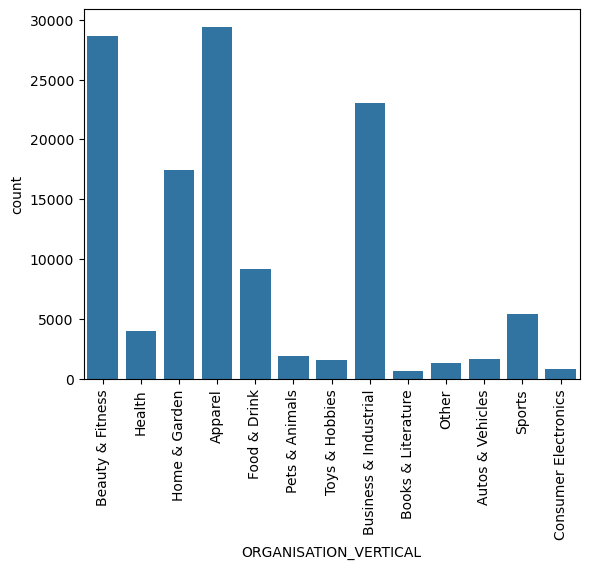

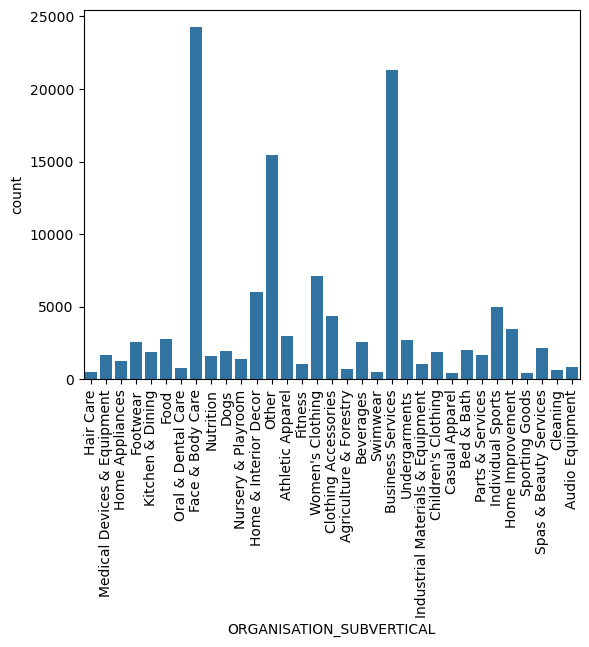

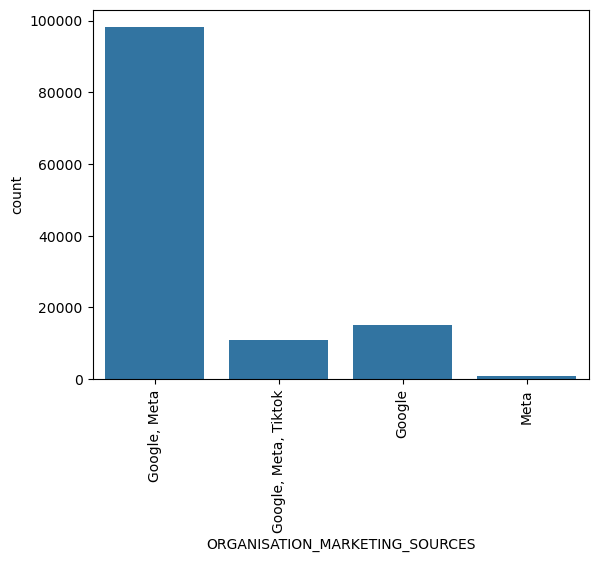

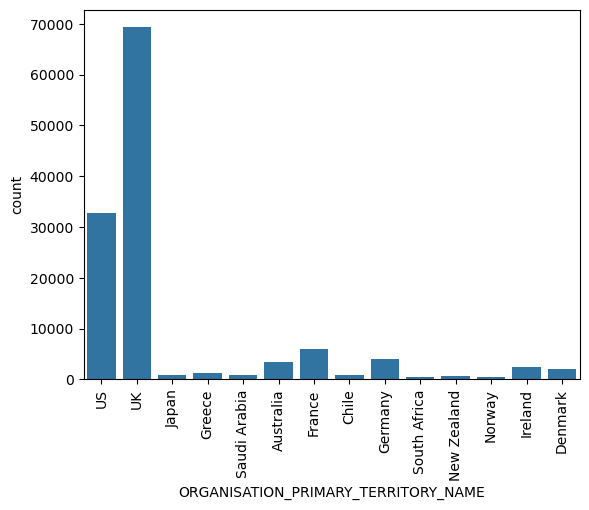

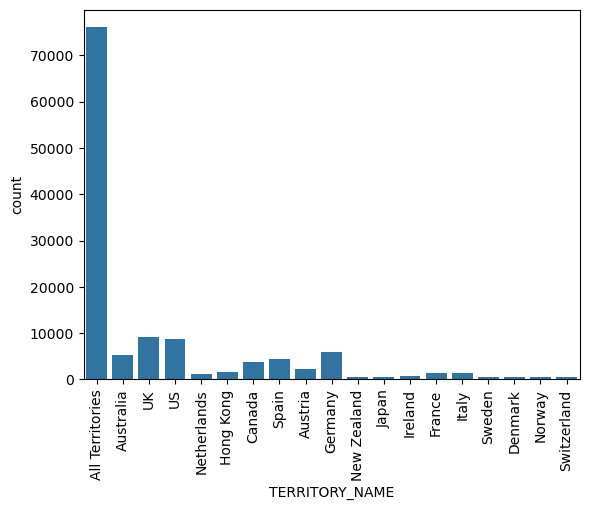

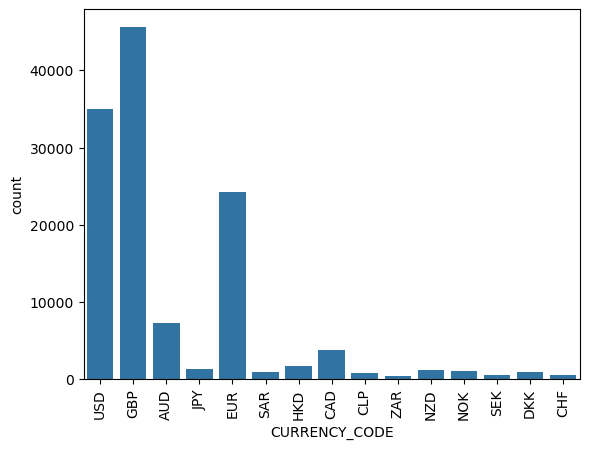

In [9]:
# visualizing number of unique elements in each categorical variable
uniq_ele = df[categorical_features].iloc[:,2:].columns
for x in uniq_ele:
    sns.countplot(x = x, data = df)
    plt.xticks(rotation=90)
    plt.show()

From the above plot we can see that there are many organizations and each organization has many products/ services. We need to find an organization that has sufficient amount of data for our model. Since an MMM model requires data that has been aggregated on weekly or monthly level, we can target getting data for an organization that has the largest number of data points. There can be a possibility that an organization might have different products/services and we might need to further filter the data to just one of them.

In [10]:
df['ORGANISATION_ID'].value_counts().nlargest(5)

ORGANISATION_ID
ba773ebd7ec0a08f1d042187d086ccb4    15182
882ce7e286d66facc66518783e2192c7     8795
429c8d00704a9ef6307b49f22d5dfade     6132
4d71c38f59c00c190ec10dbf301880cc     6000
0d1fc3f1715b0c65776780e7ad8ac7df     4214
Name: count, dtype: int64

In [11]:
df['DATE_DAY'].max(), df['DATE_DAY'].min()

(Timestamp('2024-02-27 00:00:00'), Timestamp('2019-04-08 00:00:00'))

In [12]:
df1 = df.loc[df['ORGANISATION_ID'] == 'ba773ebd7ec0a08f1d042187d086ccb4']

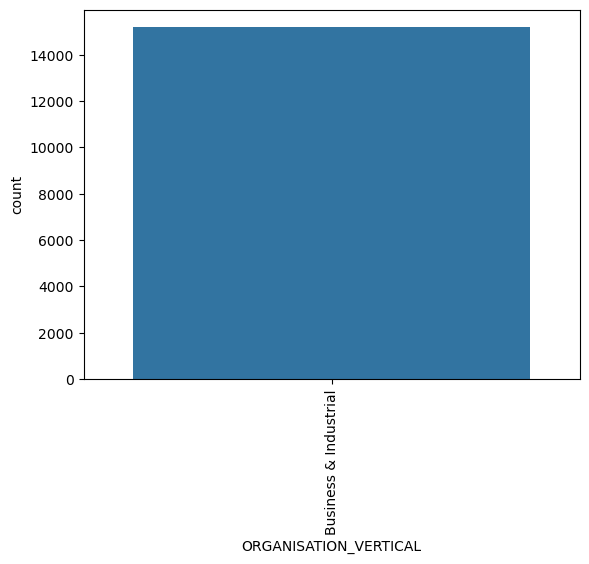

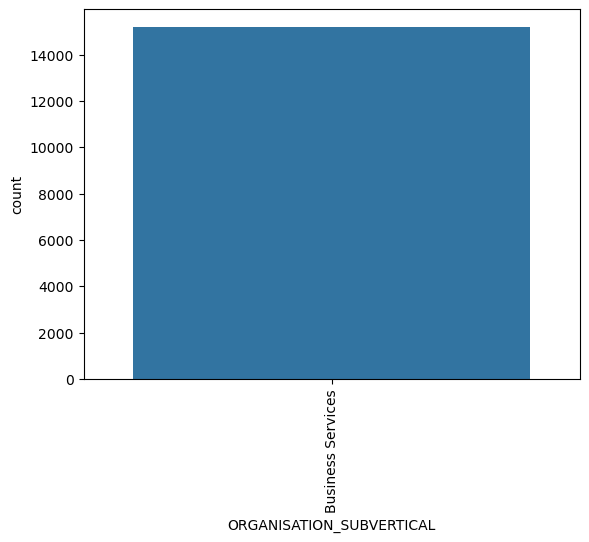

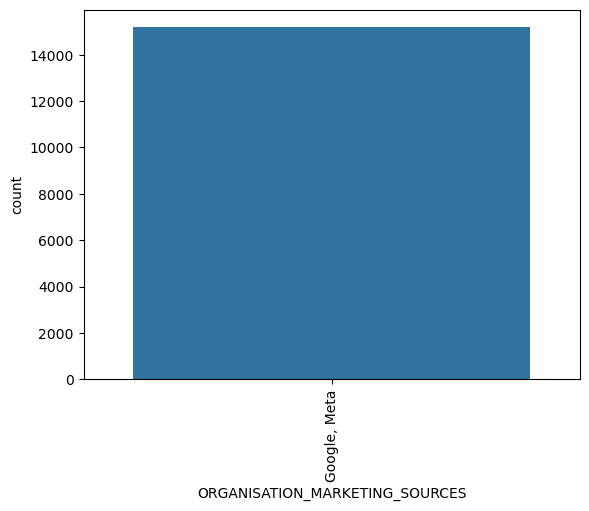

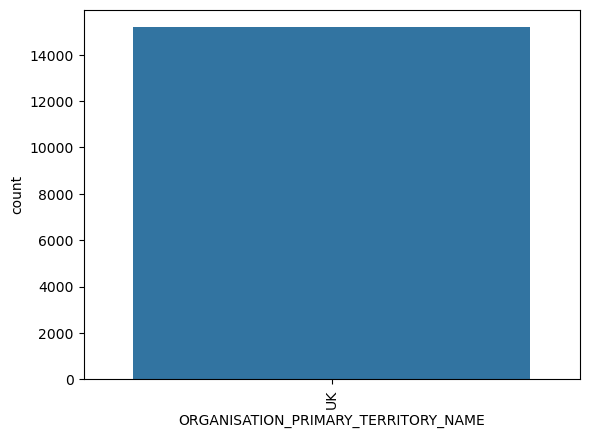

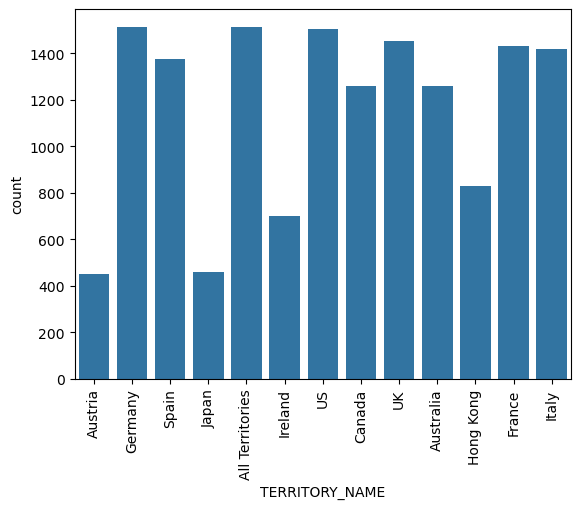

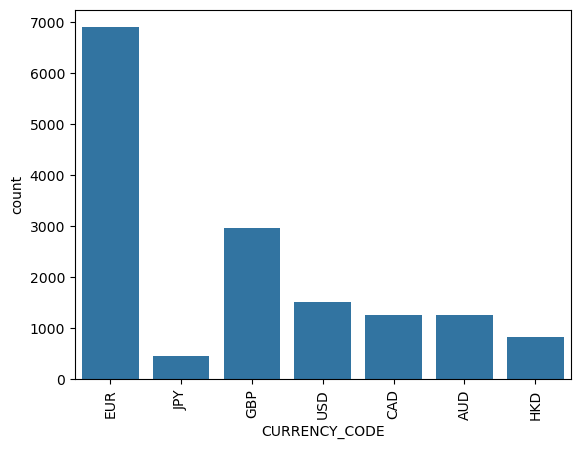

In [13]:
# understanding unique elements in the categorical data
uniq_ele = df1[categorical_features].iloc[:,2:].columns
for x in uniq_ele:
    sns.countplot(x = x, data = df1)
    plt.xticks(rotation=90)
    plt.show()

In [14]:
df1['revenue'] = (df1['ALL_PURCHASES_ORIGINAL_PRICE']*df1['ALL_PURCHASES_UNITS'])-df1['FIRST_PURCHASES_GROSS_DISCOUNT']

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_85253/2694705127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'] = (df1['ALL_PURCHASES_ORIGINAL_PRICE']*df1['ALL_PURCHASES_UNITS'])-df1['FIRST_PURCHASES_GROSS_DISCOUNT']


In [15]:
df1['MMM_TIMESERIES_ID'].value_counts()

MMM_TIMESERIES_ID
37dc412832e2dd8c5938ecbf2f4dd7fd    1514
51c8843bddcc604ebb3fe8d638ee5a1d    1514
9e596c450a0107c984ce52eab254dce3    1504
ac1ed95f5069ab8003fb61aa7b5b42f1    1455
edb2fa959b5bb803bddc33d1bd2b7ab1    1433
fb41024357c824cd0c72243a94e68fd5    1419
4417159e680462684be6d28dcd1156d2    1376
a85e68fa1eb7040cf557995d538aff66    1261
bc265a40e1a910ce1fd876f039d54416    1261
c66e76d49c7cfd159e3a4f8d882cf7dc     831
942850f29bc16dc37f03a19e57c7064c     702
4829a7de3924a9693dd7640f82b336d5     461
2a6e552bc1ef3229c110efe96d322576     451
Name: count, dtype: int64

In [16]:
df1.loc[df1['TERRITORY_NAME']== 'Germany']['MMM_TIMESERIES_ID'].unique()

array(['37dc412832e2dd8c5938ecbf2f4dd7fd'], dtype=object)

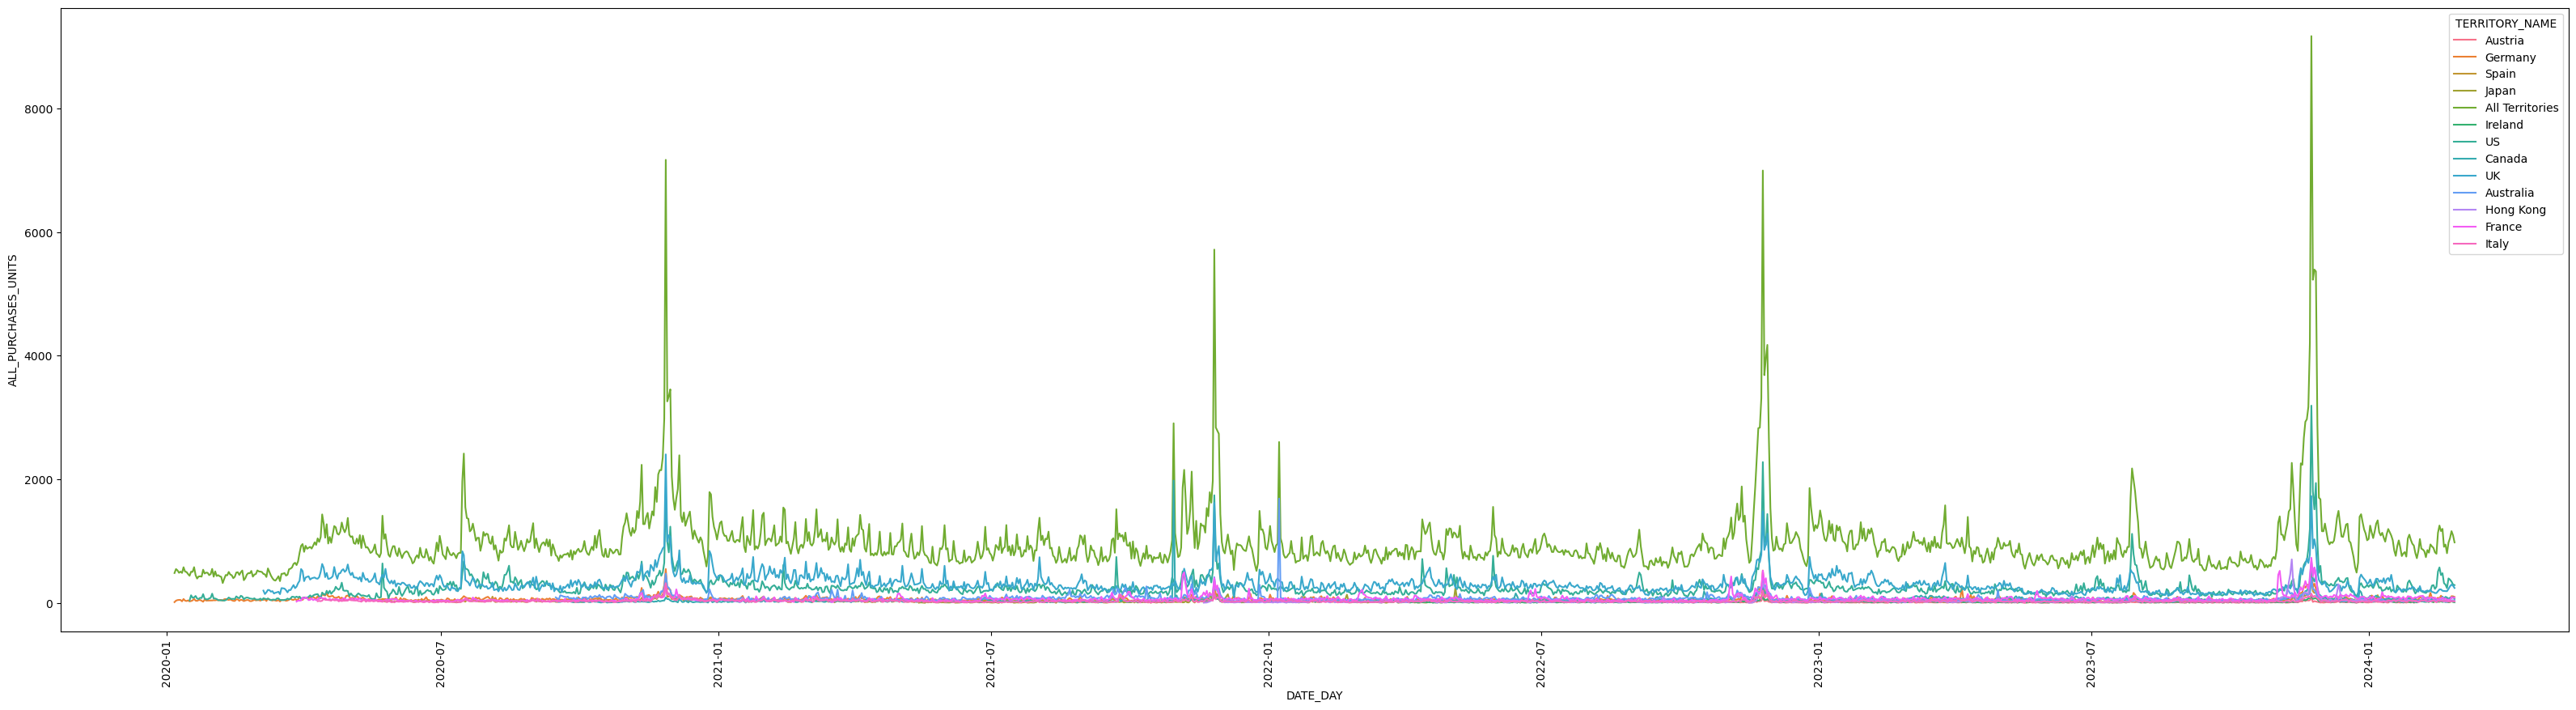

In [17]:
plt.figure(figsize= (40,10))
sns.lineplot(x = df1['DATE_DAY'], y = df1['ALL_PURCHASES_UNITS'], data = df1, hue = df1['TERRITORY_NAME'])
plt.xticks(rotation = 90)
plt.show()

In [18]:
# it is noticeable that All Territories have the aggregated data of purchased units of all countries.
# to avoid currency conversion rate dispute, we will be using All Territories since it uses the currency 
# organization's primary territory i.e. GB
df2 = df1.loc[df1['TERRITORY_NAME'] == 'All Territories']

In [19]:
for x in df2[categorical_features].columns:
    print(x, df2[x].unique())

MMM_TIMESERIES_ID ['51c8843bddcc604ebb3fe8d638ee5a1d']
ORGANISATION_ID ['ba773ebd7ec0a08f1d042187d086ccb4']
ORGANISATION_VERTICAL ['Business & Industrial']
ORGANISATION_SUBVERTICAL ['Business Services']
ORGANISATION_MARKETING_SOURCES ['Google, Meta']
ORGANISATION_PRIMARY_TERRITORY_NAME ['UK']
TERRITORY_NAME ['All Territories']
CURRENCY_CODE ['GBP']


In [20]:
clicks_impressions = ['GOOGLE_PAID_SEARCH_CLICKS',
 'GOOGLE_SHOPPING_CLICKS',
 'GOOGLE_PMAX_CLICKS',
 'GOOGLE_DISPLAY_CLICKS',
 'GOOGLE_VIDEO_CLICKS',
 'META_FACEBOOK_CLICKS',
 'META_INSTAGRAM_CLICKS',
 'META_OTHER_CLICKS',
 'TIKTOK_CLICKS',
 'GOOGLE_PAID_SEARCH_IMPRESSIONS',
 'GOOGLE_SHOPPING_IMPRESSIONS',
 'GOOGLE_PMAX_IMPRESSIONS',
 'GOOGLE_DISPLAY_IMPRESSIONS',
 'GOOGLE_VIDEO_IMPRESSIONS',
 'META_FACEBOOK_IMPRESSIONS',
 'META_INSTAGRAM_IMPRESSIONS',
 'META_OTHER_IMPRESSIONS',
 'TIKTOK_IMPRESSIONS',
 'DIRECT_CLICKS',
 'BRANDED_SEARCH_CLICKS',
 'ORGANIC_SEARCH_CLICKS',
 'EMAIL_CLICKS',
 'REFERRAL_CLICKS',
 'ALL_OTHER_CLICKS']

In [21]:
# filling nans with 0 because these nans might be an indication that investments in specific
# fields were not done due to different factors like non-acquisition season, unknown sector for
# the company
df2.fillna(0, inplace=True)

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_85253/1294478372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


### Spend And Revenue Over Years

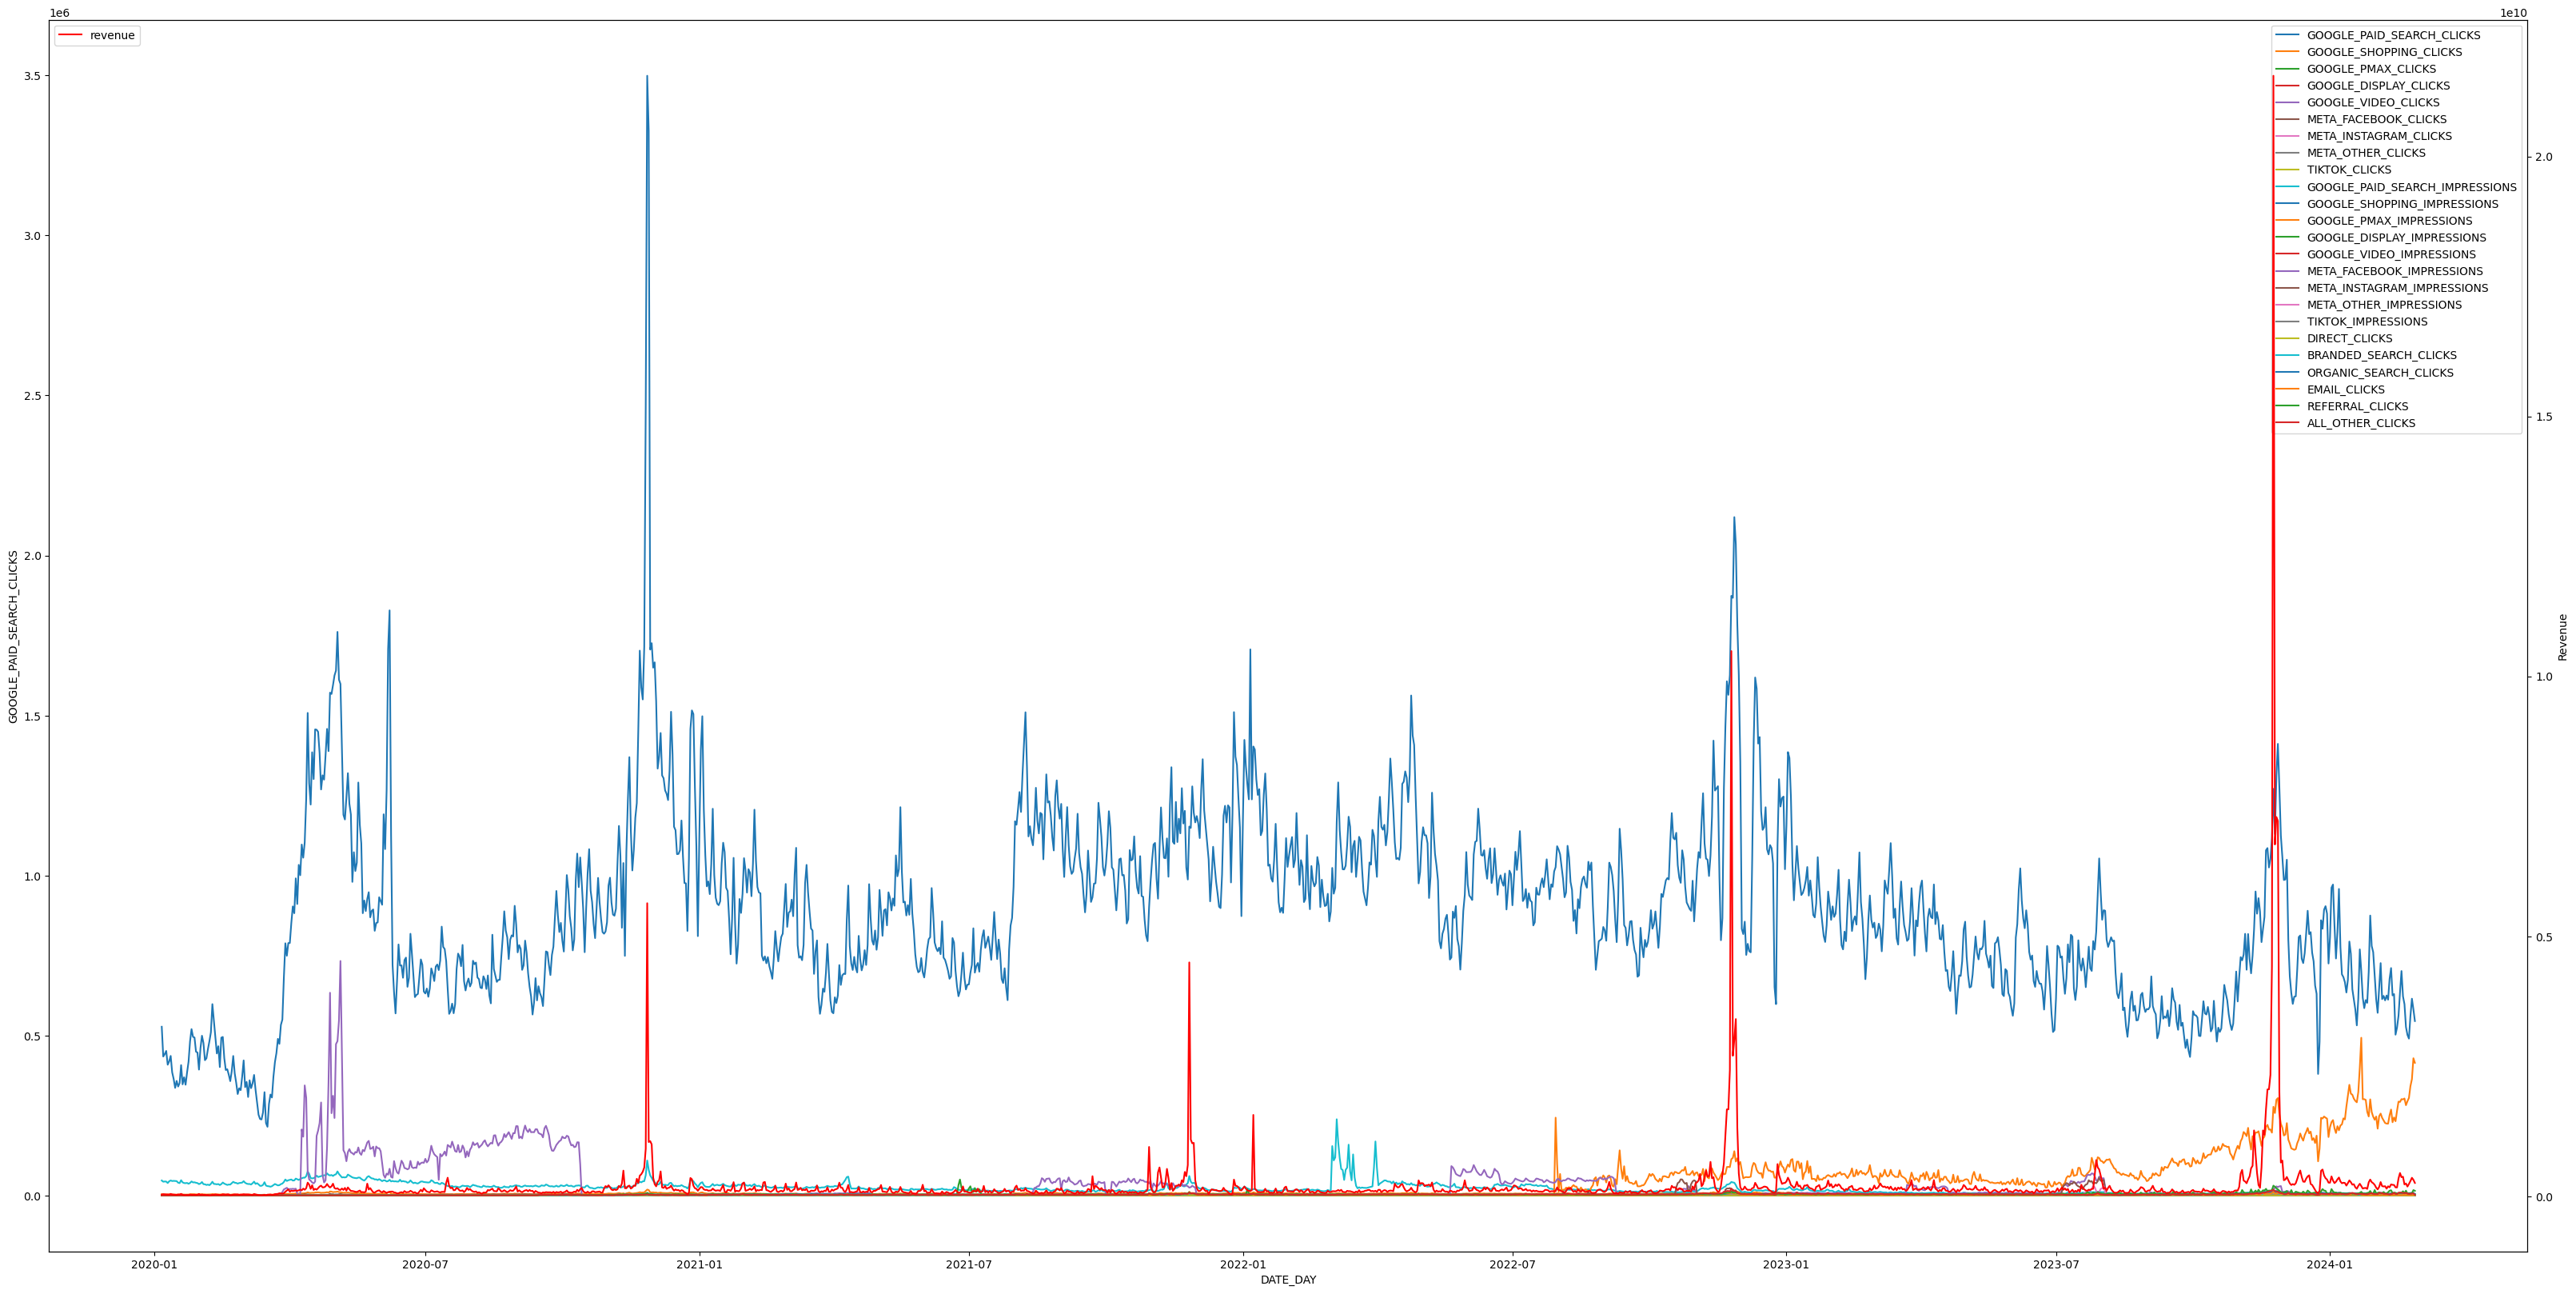

In [22]:
plt.figure(figsize=(40, 20))

# plotting the lines for clicks_impressions
for x in clicks_impressions:
    sns.lineplot(x='DATE_DAY', y=x, data=df2, label=x)

# creating a secondary y-axis for 'revenue'
ax2 = plt.gca().twinx()
sns.lineplot(x='DATE_DAY', y='revenue', data=df2, ax=ax2, color='r', label='revenue')

# setting labels and legend
plt.ylabel('Clicks/Impressions')
ax2.set_ylabel('Revenue')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()


### Correlation Plot

<AxesSubplot:>

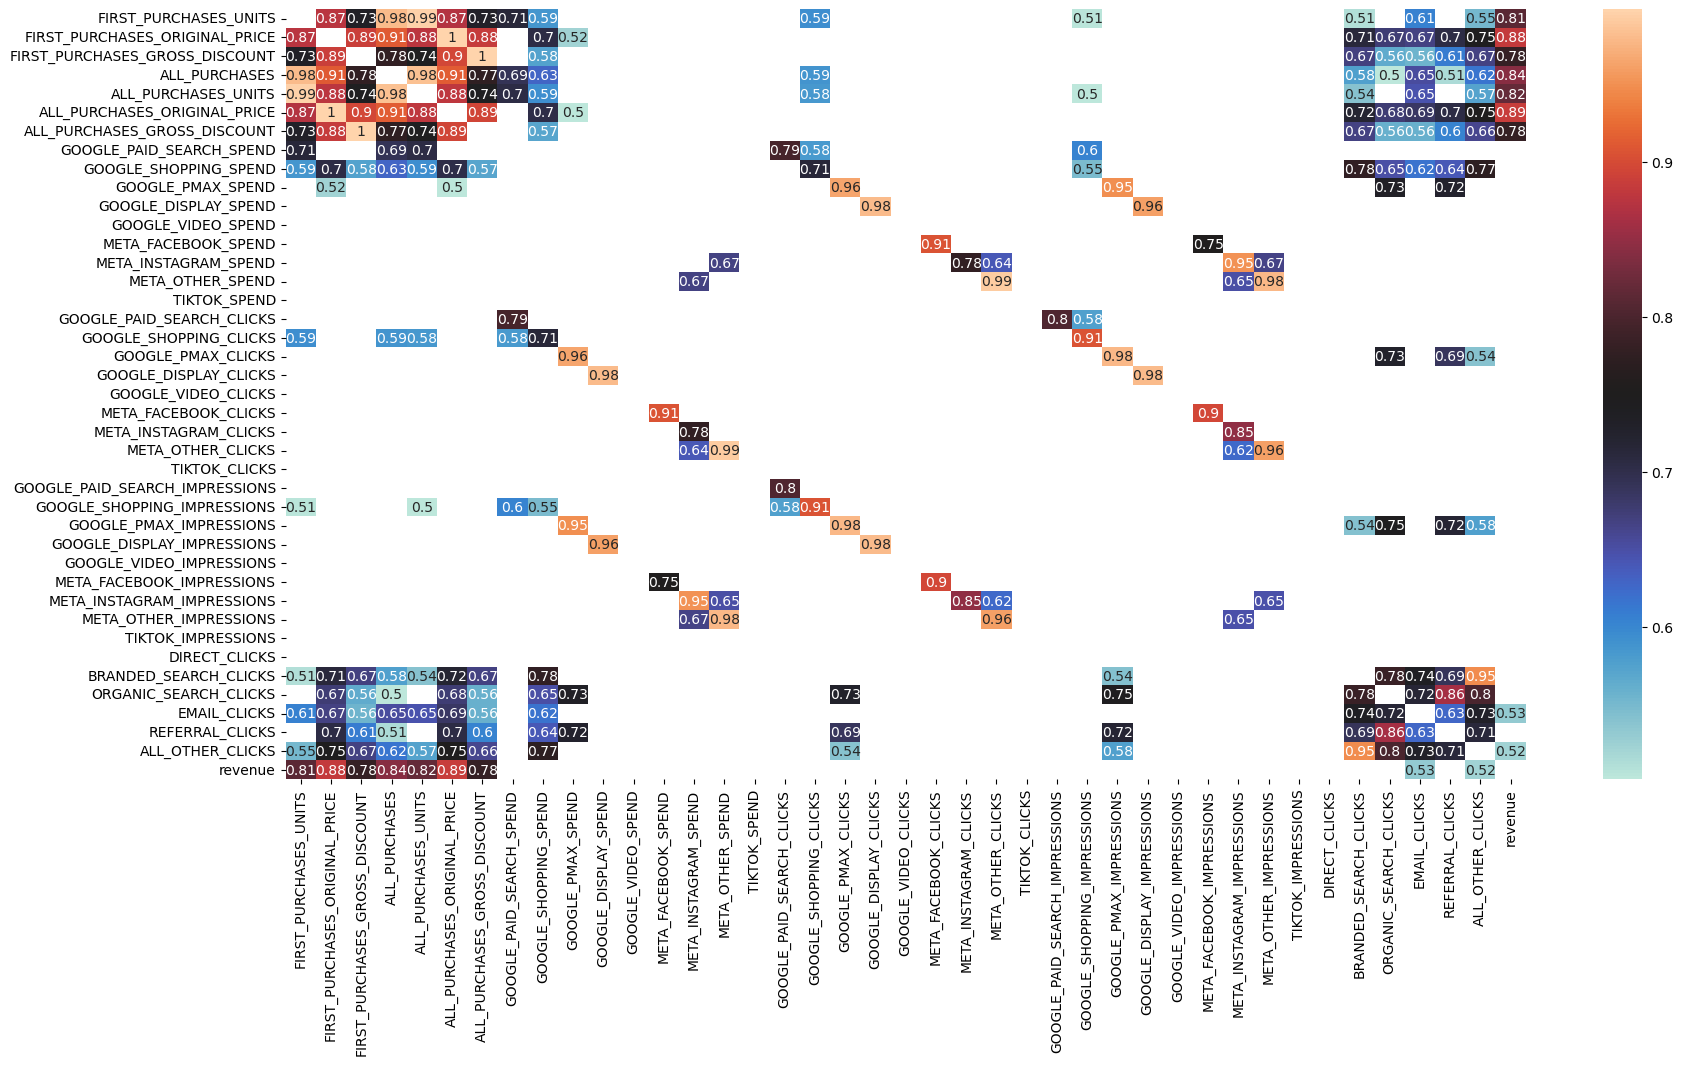

In [23]:
plt.figure(figsize = (20,10))
cor = df2.iloc[:, 10:].corr()
cor = cor[((cor < -0.5) & (cor > -1)) | ((cor > 0.5) & (cor < 1))]
sns.heatmap(cor, annot = True, cmap = 'icefire')

In [24]:
def find_correlation(df, thresh):

    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(df2.iloc[:,10:], 0.8)

['ALL_PURCHASES',
 'ALL_PURCHASES_UNITS',
 'ALL_PURCHASES_ORIGINAL_PRICE',
 'revenue',
 'FIRST_PURCHASES_UNITS',
 'ALL_PURCHASES_GROSS_DISCOUNT',
 'FIRST_PURCHASES_GROSS_DISCOUNT',
 'GOOGLE_PMAX_IMPRESSIONS',
 'GOOGLE_PMAX_SPEND',
 'GOOGLE_DISPLAY_IMPRESSIONS',
 'GOOGLE_DISPLAY_SPEND',
 'META_FACEBOOK_SPEND',
 'META_INSTAGRAM_SPEND',
 'META_OTHER_IMPRESSIONS',
 'META_OTHER_SPEND',
 'GOOGLE_PAID_SEARCH_CLICKS',
 'GOOGLE_SHOPPING_CLICKS',
 'META_INSTAGRAM_CLICKS',
 'BRANDED_SEARCH_CLICKS',
 'ORGANIC_SEARCH_CLICKS']

In the context of the correlation matrix heatmap, we can observe the relationships between various marketing metrics across channels like Google and Meta platforms. For example, the strong positive correlation between 'GOOGLE PAID SEARCH CLICKS' and 'GOOGLE SHOPPING CLICKS' (0.96) suggests a synergistic effect, where the success in one campaign could be related to improvements in the other.

Additionally, these high correlation coefficients also alert us to potential multicollinearity if these metrics were to be used as predictors in a regression model. Multicollinearity occurs when predictors are highly correlated and thus, can provide redundant information, which may lead to instability in the model and difficulty in interpreting individual predictor effects. In practical terms, this means that care should be taken when constructing models with these variables to ensure that multicollinearity does not distort the results or impede the reliability of the model's predictions.

In [25]:
df2.drop(['MMM_TIMESERIES_ID', 'ORGANISATION_ID', 'ORGANISATION_VERTICAL',
           'ORGANISATION_SUBVERTICAL', 'ORGANISATION_MARKETING_SOURCES',
           'ORGANISATION_PRIMARY_TERRITORY_NAME', 'TERRITORY_NAME', 'CURRENCY_CODE',
         'ALL_PURCHASES'],
         inplace= True, axis = 1)

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_85253/2063249028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['MMM_TIMESERIES_ID', 'ORGANISATION_ID', 'ORGANISATION_VERTICAL',


### Conducting OLS For Feature Selection

In [26]:
import statsmodels.api as sm
results = sm.OLS(df2['ALL_PURCHASES_UNITS'], df2.iloc[:,1:].drop('ALL_PURCHASES_UNITS',
                                                                 axis = 1)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ALL_PURCHASES_UNITS   R-squared (uncentered):                   0.999
Model:                             OLS   Adj. R-squared (uncentered):              0.999
Method:                  Least Squares   F-statistic:                          4.885e+04
Date:                 Mon, 22 Apr 2024   Prob (F-statistic):                        0.00
Time:                         23:17:37   Log-Likelihood:                         -7473.4
No. Observations:                 1514   AIC:                                  1.501e+04
Df Residuals:                     1481   BIC:                                  1.519e+04
Df Model:                           33                                                  
Covariance Type:             nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
FIRST_PURCHASES                    0.0034      0.024      0.141      0.888      -0.044       0.051
FIRST_PURCHASES_UNITS              1.2703      0.013     94.473      0.000       1.244       1.297
FIRST_PURCHASES_ORIGINAL_PRICE    -0.0050      0.000    -20.937      0.000      -0.005      -0.005
FIRST_PURCHASES_GROSS_DISCOUNT    -0.0039      0.001     -3.462      0.001      -0.006      -0.002
ALL_PURCHASES_ORIGINAL_PRICE       0.0041      0.000     22.417      0.000       0.004       0.004
ALL_PURCHASES_GROSS_DISCOUNT       0.0024      0.001      2.717      0.007       0.001       0.004
GOOGLE_PAID_SEARCH_SPEND          -0.0032      0.005     -0.661      0.509      -0.013       0.006
GOOGLE_SHOPPING_SPEND              0.0011      0.001      0.801      0.423      -0.002       0.004
GOOGLE_PMAX_SPEND                 -0.0284      0.007     -4.275      0.000      -0.041      -0.015
GOOGLE_DISPLAY_SPEND               0.6152      1.404      0.438      0.661      -2.139       3.369
GOOGLE_VIDEO_SPEND              3.236e-11   6.79e-11      0.476      0.634   -1.01e-10    1.66e-10
META_FACEBOOK_SPEND                0.0072      0.007      0.979      0.328      -0.007       0.022
META_INSTAGRAM_SPEND              -0.3368      0.088     -3.825      0.000      -0.510      -0.164
META_OTHER_SPEND                   4.8327      2.588      1.868      0.062      -0.243       9.909
TIKTOK_SPEND                    3.121e-11   6.56e-11      0.476      0.634   -9.74e-11     1.6e-10
GOOGLE_PAID_SEARCH_CLICKS         -0.0110      0.007     -1.629      0.104      -0.024       0.002
GOOGLE_SHOPPING_CLICKS            -0.0097      0.002     -4.415      0.000      -0.014      -0.005
GOOGLE_PMAX_CLICKS                 0.0401      0.008      4.830      0.000       0.024       0.056
GOOGLE_DISPLAY_CLICKS              0.0296      0.304      0.097      0.922      -0.567       0.627
GOOGLE_VIDEO_CLICKS            -8.089e-12   1.72e-11     -0.471      0.637   -4.17e-11    2.56e-11
META_FACEBOOK_CLICKS               0.0037      0.005      0.786      0.432      -0.006       0.013
META_INSTAGRAM_CLICKS              0.0044      0.017      0.253      0.800      -0.030       0.038
META_OTHER_CLICKS                 -1.3312      0.606     -2.196      0.028      -2.520      -0.142
TIKTOK_CLICKS                   1.031e-12   2.08e-12      0.496      0.620   -3.05e-12    5.11e-12
GOOGLE_PAID_SEARCH_IMPRESSIONS     0.0003      0.000      2.242      0.025    3.74e-05       0.001
GOOGLE_SHOPPING_IMPRESSIONS     4.114e-05   1.11e-05      3.705      0.000    1.94e-05    6.29e-05
GOOGLE_PMAX_IMPRESSIONS           -0.0002    7.3e-05     -3.398      0.001      -0.000      -0.000
GOO

The OLS regression was performed as a part of feature selection to identify significant predictors for causal inference regarding the target variable 'ALL_PURCHASES_UNITS'. This step helps isolate variables that exhibit a consistent and meaningful impact on the dependent variable, distinguishing them from noise. Statistically insignificant variables, which show a weak or no effect on the target, can potentially be discarded, simplifying the model without sacrificing explanatory power.

Significant predictors may serve as control variables in a marketing mix model (MMM) to adjust for external influences, like seasonal variations or atypical events that could cause sudden spikes in the data. By accounting for these fluctuations through control variables, the MMM can better isolate and quantify the direct effects of marketing tactics on sales. This refinement enhances the model's capacity to reveal true causal relationships, guiding decision-making with clearer insights into the efficacy of different marketing strategies.

In [27]:
# dropping columns that aren't signicant enough for the prediction of target variable
df2.drop(['GOOGLE_PAID_SEARCH_CLICKS', 'GOOGLE_DISPLAY_CLICKS', 'GOOGLE_VIDEO_CLICKS',
          'META_FACEBOOK_CLICKS', 'META_INSTAGRAM_CLICKS', 'TIKTOK_CLICKS',
          'GOOGLE_DISPLAY_IMPRESSIONS', 'GOOGLE_VIDEO_IMPRESSIONS', 'META_FACEBOOK_IMPRESSIONS',
          'META_OTHER_IMPRESSIONS', 'TIKTOK_IMPRESSIONS', 'DIRECT_CLICKS', 'REFERRAL_CLICKS'],
         inplace = True, axis = 1)

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_85253/4055696351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['GOOGLE_PAID_SEARCH_CLICKS', 'GOOGLE_DISPLAY_CLICKS', 'GOOGLE_VIDEO_CLICKS',


In [28]:
spend_vars = [
    'GOOGLE_PAID_SEARCH_SPEND',
    'GOOGLE_SHOPPING_SPEND',
    'GOOGLE_PMAX_SPEND',
    'META_FACEBOOK_SPEND',
    'META_INSTAGRAM_SPEND'
]

clicks_impressions_vars = [
                'FIRST_PURCHASES_UNITS',
                'FIRST_PURCHASES_ORIGINAL_PRICE',
                'FIRST_PURCHASES_GROSS_DISCOUNT',
                'ALL_PURCHASES_ORIGINAL_PRICE',
                'ALL_PURCHASES_GROSS_DISCOUNT',
                'GOOGLE_SHOPPING_CLICKS',
                'GOOGLE_PMAX_CLICKS',
                'META_OTHER_CLICKS',
                'GOOGLE_PAID_SEARCH_IMPRESSIONS',
                'GOOGLE_SHOPPING_IMPRESSIONS',
                'GOOGLE_PMAX_IMPRESSIONS',
                'META_INSTAGRAM_IMPRESSIONS',
                'BRANDED_SEARCH_CLICKS',
                'ORGANIC_SEARCH_CLICKS',
                'EMAIL_CLICKS',
                'ALL_OTHER_CLICKS'
               ]

date_var = 'DATE_DAY'

kpi = 'ALL_PURCHASES_UNITS'

In [29]:
# !pip install --upgrade pandas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df2.set_index(date_var, inplace=True)
df2 = df2.resample('W').sum()

In [31]:
# convert 'DATE_DAY' to datetime and extract year
df2['year'] = df2.index.to_series().dt.year

In [32]:
# group by year and sum each category
spend_data = df2.groupby('year')[spend_vars].sum()
clicks_data = df2.groupby('year')[clicks_impressions_vars].sum()

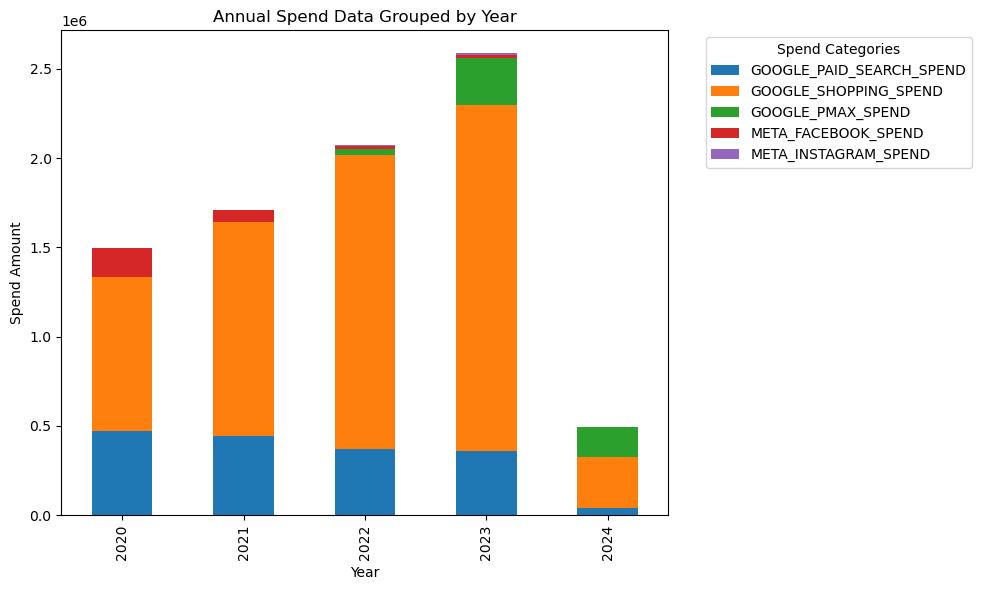

In [33]:
# plotting the spend variables
plt.figure(figsize=(10, 6))
spend_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Annual Spend Data Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Spend Amount')
plt.legend(title='Spend Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

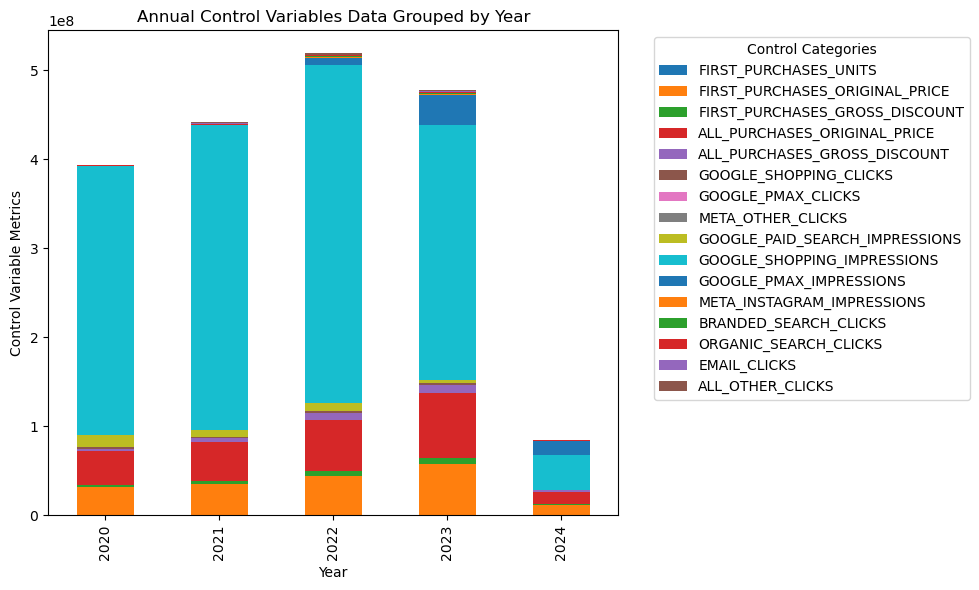

In [34]:
plt.figure(figsize=(10, 6))
clicks_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Annual Control Variables Data Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Control Variable Metrics')
plt.legend(title='Control Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

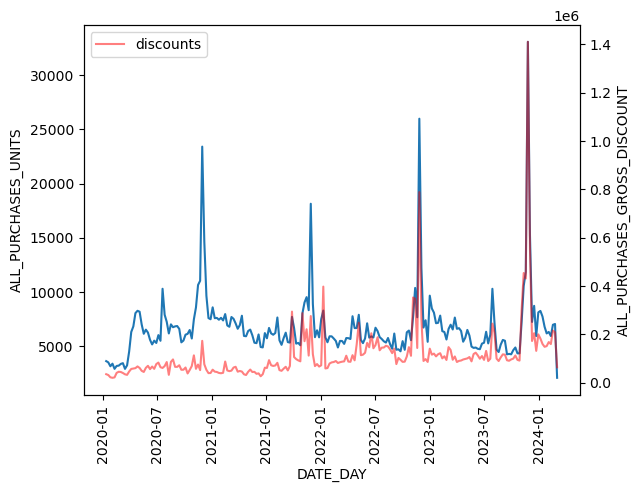

In [35]:
sns.lineplot(x=df2.index, y = df2['ALL_PURCHASES_UNITS'])
plt.xticks(rotation = 90)
ax2 = plt.gca().twinx()
sns.lineplot(x=df2.index, y = df2['ALL_PURCHASES_GROSS_DISCOUNT'], ax=ax2, color='r', label='discounts', alpha = 0.5)
plt.xticks(rotation = 90)
plt.show()

In [36]:
control_vars = ['ALL_PURCHASES_GROSS_DISCOUNT']

# Analysis Based On The Data And The Above Plots

Upon examining the provided charts illustrating **Annual Spend Data Grouped by Year** and **Annual Control Variables Data Grouped by Year** several insights and hypotheses emerge. The spend data indicates an overall escalation in marketing expenditures across various channels from 2020 to 2023, with a marked preference for Google-related advertising such as 'GOOGLE_PAID_SEARCH_SPEND' and 'GOOGLE_SHOPPING_SPEND.' This suggests a strategic emphasis on these platforms, potentially for their broad reach or high ROI. However, there is a notable decline in spending across all categories in 2024, which may signal a shift in strategy or a reaction to external factors, or it might simply reflect incomplete data for the current year. The control variables show a similar trend, with 'FIRST_PURCHASES_UNITS' dominating the metrics, possibly indicating a focus on acquiring new customers.

These trends provide a foundation for several hypotheses that could be tested through Marketing Mix Modeling (MMM). It would be reasonable to hypothesize that the significant allocation to Google Shopping could yield a higher ROI, or that increased spending in certain categories leads to enhanced control metrics like clicks and impressions. Moreover, the possibility of diminishing returns or cross-channel effectiveness, where investment in one channel boosts performance in another, can be considered. A notable hypothesis is the presence of a temporal lag effect, where the impact of marketing spend is not immediate but rather influences future performance metrics. Lastly, the data might reveal a cannibalization effect, where increased investment in specific channels may detract from the performance of others. Testing these hypotheses with MMM could unveil intricate dynamics of marketing efficiency and inform more strategic budget allocations. External factors such as market trends, competitive actions, and economic shifts, which are not captured in the data, must also be taken into account as they could significantly influence the observed patterns.

The graph suggests a temporal relationship between 'ALL_PURCHASES_UNITS' and 'discounts', potentially indicative of seasonality or irregular purchasing patterns. Sharp peaks in 'discounts' correspond to similar, albeit less pronounced, movements in 'ALL_PURCHASES_UNITS'. This visual correlation may imply that discounting strategies drive purchase behaviors at certain times, which could reflect seasonal promotions or special sales events. Identifying this variable as a control could therefore help in deconstructing the components of sales fluctuations, enhancing the MMM's ability to parse out seasonal effects from the impact of marketing activities.

In [37]:
df2.drop(['GOOGLE_VIDEO_SPEND', 'TIKTOK_SPEND', 'META_OTHER_SPEND'], axis =1 , inplace = True)

# Model Development and Evaluation

In [38]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df2.drop('ALL_PURCHASES_UNITS', axis=1),
                                                      df2['ALL_PURCHASES_UNITS'],
                                                      test_size= 0.2,
                                                      shuffle=False)

In [39]:
# find priors
spend_by_channel = df2[spend_vars].sum(axis=0)
spend_share = spend_by_channel / spend_by_channel.sum()

HALFNORMAL_SCALE = 1 / np.sqrt(1 - 2 / np.pi)

n_channels = len(spend_vars)

prior_sigma = HALFNORMAL_SCALE * n_channels * spend_share.to_numpy()
prior_sigma.tolist()

[1.6661028868428034,
 5.889446754375514,
 0.46202483004308875,
 0.26435427063708045,
 0.012554957953043747]

We are calculating the distribution of advertising spending across various channels and then setting up initial assumptions—known as priors—for a statistical model. First, we sum the spending for each channel and then determine each channel's share of the total spend. These shares are then used to scale a statistical distribution, specifically a half-normal distribution, to determine the 'prior_sigma', which represents our initial guesses for the variability of each channel's impact on the outcome we're studying. These 'priors' will be used by the model to refine its estimates based on actual data.

In [40]:
#set model congifuration with our priors for each parameter

mmm_config = {
    'intercept': {'dist': 'LogNormal',
              'kwargs': {'mu': 0.5, 'sigma': 2}},

    'beta_channel': {'dist': 'LogNormal', # parameters for our media channels
                     'kwargs': {'mu':1, 'sigma': prior_sigma}},

    'alpha': {'dist': 'Beta', # parameter for adstock function for medial channels
              'kwargs': {'alpha': 1, 'beta': 3}},

    'lam': {'dist': 'Gamma',  # parameter for the saturation function for media channels
            'kwargs': {'alpha': 3, 'beta': 1}},

    'likelihood': {'dist': 'Normal',
                   'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},

    'gamma_control': {'dist': 'Normal', # parameter for any control variables
                      'kwargs': {'mu': 0, 'sigma': 1}},

    'gamma_fourier': {'dist': 'Laplace', # parameter for fourier series to model seasonality
                      'kwargs': {'mu': 0, 'b': 3}}
            }

In [41]:
# !pip install arviz==0.6.1
# !pip install pymc3==3.8
# !pip install Theano==1.0.4

In [42]:
# !pip install pymc-marketing

In [43]:
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM

In [44]:
# progress bar
sampler_config= {"progressbar": True}

In [45]:
#building the model
mmm = DelayedSaturatedMMM(
    model_config = mmm_config,
    sampler_config = sampler_config,
    date_column = date_var,
    channel_columns = spend_vars,
    control_columns = control_vars,
    adstock_max_lag=8,
    yearly_seasonality=2,
)

In [46]:
# fitting the model
mmm.fit(X=df_train.reset_index(), y=y_train, target_accept=0.90, chains=4,
        random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_channel, alpha, lam, gamma_control, gamma_fourier, likelihood_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [47]:
mmm.fit_result

<xarray.Dataset> Size: 117MB
Dimensions:                    (chain: 4, draw: 1000, control: 1,
                                fourier_mode: 4, channel: 5, date: 173)
Coordinates:
  * chain                      (chain) int64 32B 0 1 2 3
  * draw                       (draw) int64 8kB 0 1 2 3 4 ... 996 997 998 999
  * control                    (control) <U28 112B 'ALL_PURCHASES_GROSS_DISCO...
  * fourier_mode               (fourier_mode) <U11 176B 'sin_order_1' ... 'co...
  * channel                    (channel) <U24 480B 'GOOGLE_PAID_SEARCH_SPEND'...
  * date                       (date) datetime64[ns] 1kB 2020-01-12 ... 2023-...
Data variables: (12/13)
    gamma_control              (chain, draw, control) float64 32kB 3.579e-07 ...
    gamma_fourier              (chain, draw, fourier_mode) float64 128kB -0.0...
    intercept                  (chain, draw) float64 32kB 0.03946 ... 0.01678
    beta_channel               (chain, draw, channel) float64 160kB 1.586 ......
    alpha                      (chain, draw, channel) float64 160kB 0.05672 ....
    lam                        (chain, draw, channel) float64 160kB 0.7985 .....
    ...                         ...
    channel_adstock            (chain, draw, date, channel) float64 28MB 0.28...
    channel_adstock_saturated  (chain, draw, date, channel) float64 28MB 0.11...
    channel_contributions      (chain, draw, date, channel) float64 28MB 0.17...
    control_contributions      (chain, draw, date, control) float64 6MB 0.012...
    fourier_contributions      (chain, draw, date, fourier_mode) float64 22MB ...
    mu                         (chain, draw, date) float64 6MB 0.2352 ... 0.2334
Attributes:
    created_at:                 2024-04-23T04:19:17.934242
    arviz_version:              0.17.1
    inference_library:          pymc
    inference_library_version:  5.12.0
    sampling_time:              89.86193513870239
    tuning_steps:               1000

In [48]:
az.summary(
    data=mmm.fit_result,
    var_names=[
        'intercept', 
        'beta_channel', 
        'alpha', 
        'lam', 
        'gamma_fourier', 
        'likelihood_sigma'
    ],
)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
intercept                               0.023  0.012   0.002    0.043      0.000    0.000    2351.0    1597.0   1.00
beta_channel[GOOGLE_PAID_SEARCH_SPEND]  2.731  1.789   0.830    5.615      0.052    0.037    1456.0    1288.0   1.01
beta_channel[GOOGLE_SHOPPING_SPEND]     0.028  0.047   0.000    0.094      0.001    0.001    1649.0    1806.0   1.00
beta_channel[GOOGLE_PMAX_SPEND]         1.589  0.764   0.433    2.913      0.013    0.010    3177.0    2731.0   1.00
beta_channel[META_FACEBOOK_SPEND]       2.294  0.616   1.267    3.449      0.010    0.007    3894.0    2937.0   1.00
beta_channel[META_INSTAGRAM_SPEND]      2.718  0.035   2.651    2.783      0.001    0.000    3985.0    2978.0   1.00
alpha[GOOGLE_PAID_SEARCH_SPEND]         0.113  0.061   0.001    0.216      0.001    0.001    2308.0    1321.0   1.00
alpha[GOOGLE_SHOPPING_SPEND]            0.217  0.185   0.000    0.572      0.003    0.002    3650.0    2272.0   1.00
alpha[GOOGLE_PMAX_SPEND]                0.239  0.191   0.000    0.602      0.003    0.002    3391.0    1976.0   1.00
alpha[META_FACEBOOK_SPEND]              0.250  0.203   0.000    0.641      0.003    0.002    2707.0    1835.0   1.00
alpha[META_INSTAGRAM_SPEND]             0.175  0.156   0.000    0.461      0.002    0.002    4193.0    1935.0   1.00
lam[GOOGLE_PAID_SEARCH_SPEND]           0.594  0.263   0.136    1.070      0.006    0.005    1517.0    1288.0   1.01
lam[GOOGLE_SHOPPING_SPEND]              3.010  1.805   0.319    6.388      0.026    0.018    3595.0    2309.0   1.00
lam[GOOGLE_PMAX_SPEND]                  0.052  0.035   0.004    0.114      0.001    0.000    2756.0    2730.0   1.00
lam[META_FACEBOOK_SPEND]                0.023  0.013   0.003    0.047      0.000    0.000    2941.0    2419.0   1.00
lam[META_INSTAGRAM_SPEND]               0.059  0.025   0.015    0.105      0.000    0.000    3243.0    1970.0   1.00
gamma_fourier[sin_order_1]             -0.002  0.006  -0.012    0.010      0.000    0.000    4138.0    2982.0   1.00
gamma_fourier[cos_order_1]              0.017  0.006   0.006    0.028      0.000    0.000    4197.0    2834.0   1.00
gamma_fourier[sin_order_2]             -0.019  0.006  -0.029   -0.009      0.000    0.000    3319.0    2811.0   1.00
gamma_fourier[cos_order_2]             -0.002  0.006  -0.012    0.009      0.000    0.000    3937.0    2273.0   1.00
likelihood_sigma                        0.049  0.003   0.044    0.055      0.000    0.000    3703.0    2758.0   1.00

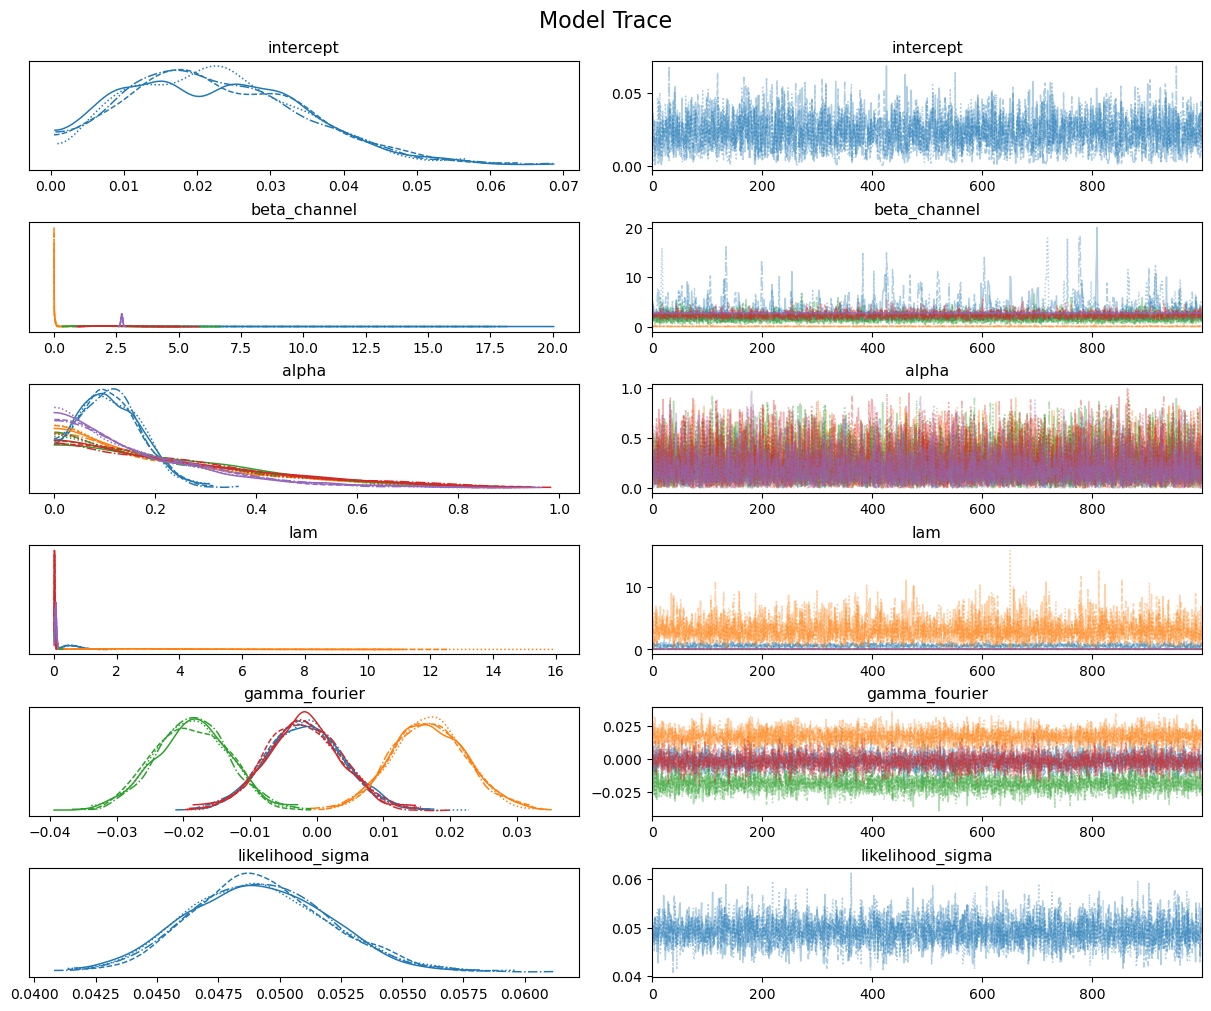

In [49]:
_ = az.plot_trace(
    data=mmm.fit_result,
    var_names=[
        'intercept', 
        'beta_channel', 
        'alpha', 
        'lam', 
        'gamma_fourier', 
        'likelihood_sigma'
    ],
    compact=True,
    backend_kwargs={"figsize": (12, 10), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16);

Sampling: [y]


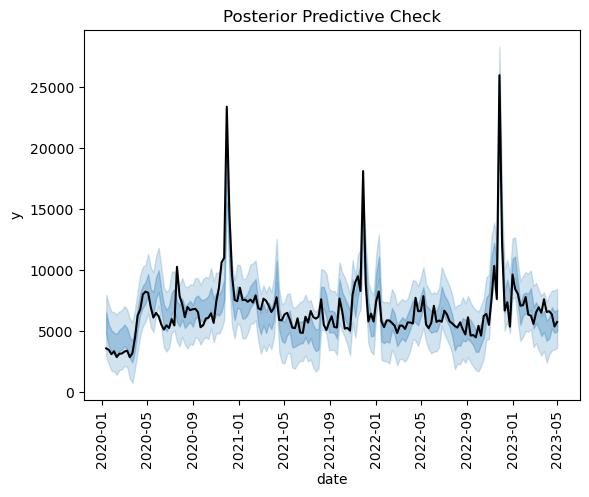

In [50]:
y_train_pred = mmm.sample_posterior_predictive(df_train.reset_index(), extend_idata=True, combined=True)
mmm.plot_posterior_predictive(original_scale=True)
plt.xticks(rotation = 90)
plt.show()

In [51]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

y_train_pred_mean = y_train_pred['y'].mean(dim='sample').values

r_squared_training = r2_score(y_train, y_train_pred_mean)

mape = mean_absolute_percentage_error(y_train, y_train_pred_mean)

print('R-Squared score: ', r_squared_training)
print('Mean Absolute Percentage Error: ', mape)

R-Squared score:  0.7916302298087524
Mean Absolute Percentage Error:  0.14167899051155472


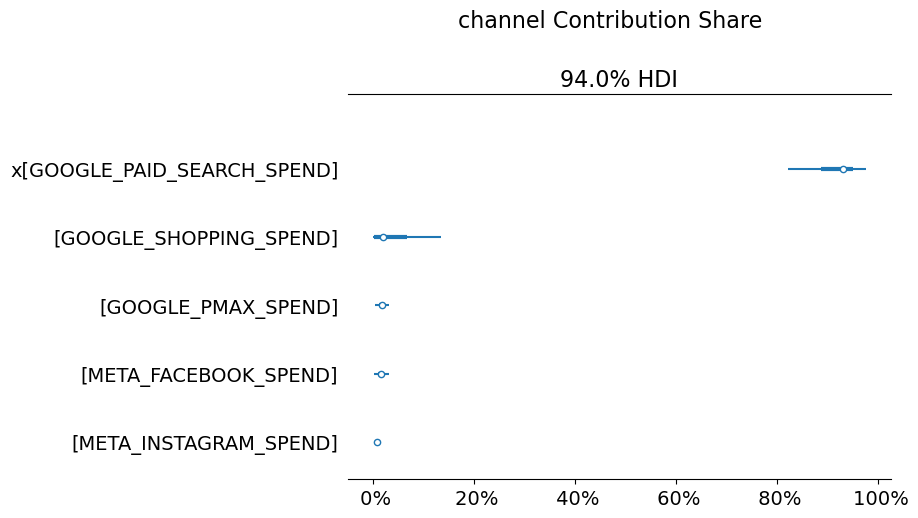

In [52]:
# channel contributions to revenue

fig = mmm.plot_channel_contribution_share_hdi(figsize=(7, 5))

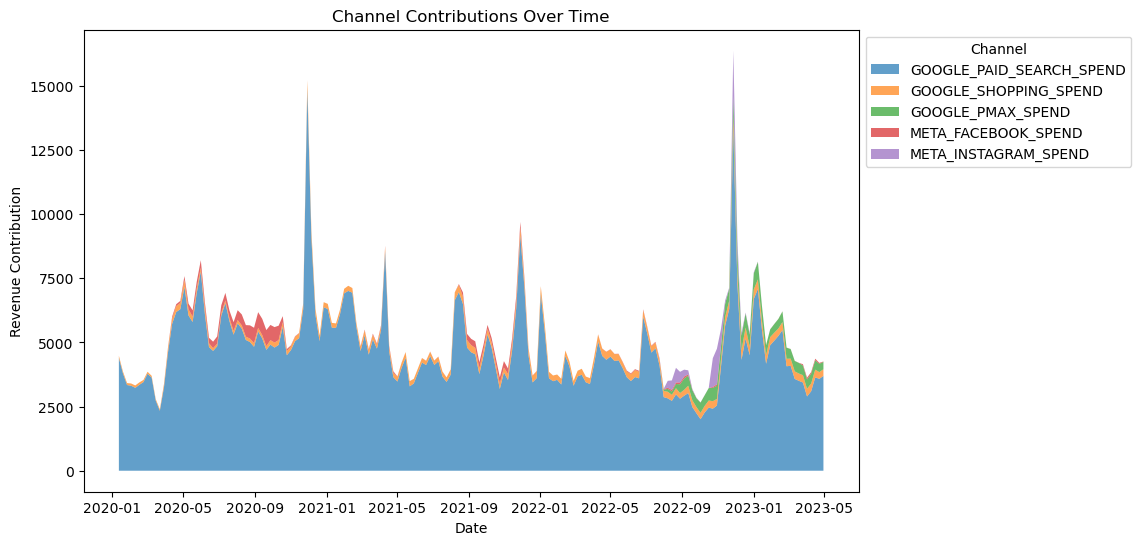

In [53]:
# channel contribution

df_attribution = (
    mmm.compute_channel_contribution_original_scale()
    .mean(dim=('chain','draw'))
    .to_dataframe(name='attribution')
    .reset_index()
    .pivot(index='date', columns='channel', values='attribution')
    .reset_index()
    .rename_axis(None, axis=1)
)

column_order = df_attribution.drop('date', axis=1).sum(axis=0).sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 6))

bottom = 0  # Initialize bottom value for stacking

for channel in column_order:
    ax.fill_between(df_attribution['date'], bottom, bottom + df_attribution[channel], label=channel, alpha=0.7)
    bottom += df_attribution[channel]

plt.xlabel('Date')
plt.ylabel('Revenue Contribution')
plt.title('Channel Contributions Over Time')
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [54]:
# fig = mmm.plot_direct_contribution_curves(show_fit=True)
# [ax.set(xlabel="x") for ax in fig.axes]
# plt.show()

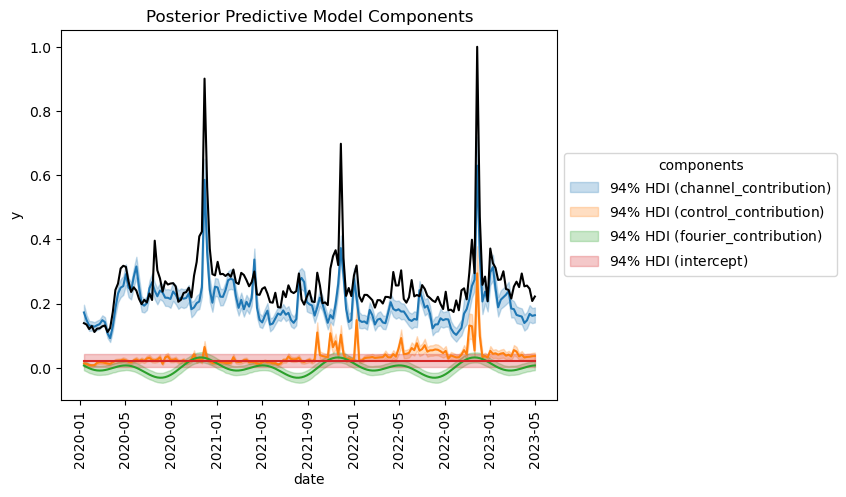

In [55]:
mmm.plot_components_contributions()
plt.xticks(rotation = 90)
plt.show()

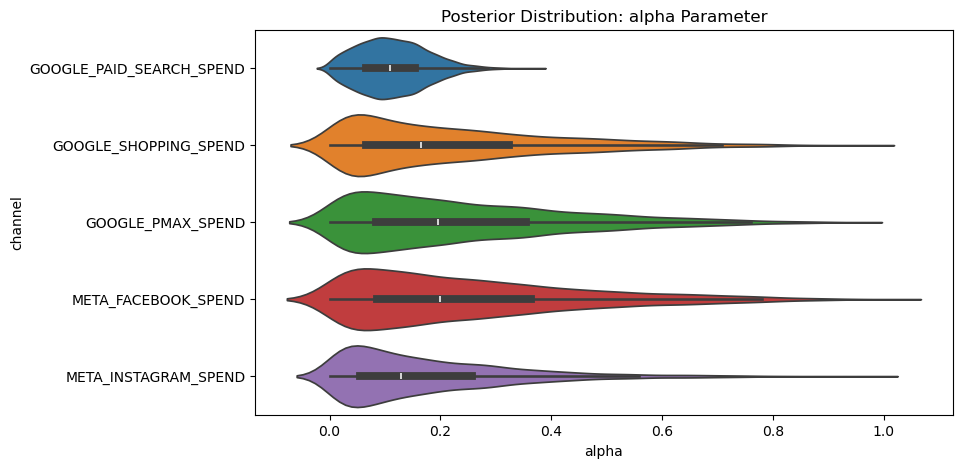

In [56]:
mmm.plot_channel_parameter(param_name="alpha", figsize=(9, 5))
plt.show()

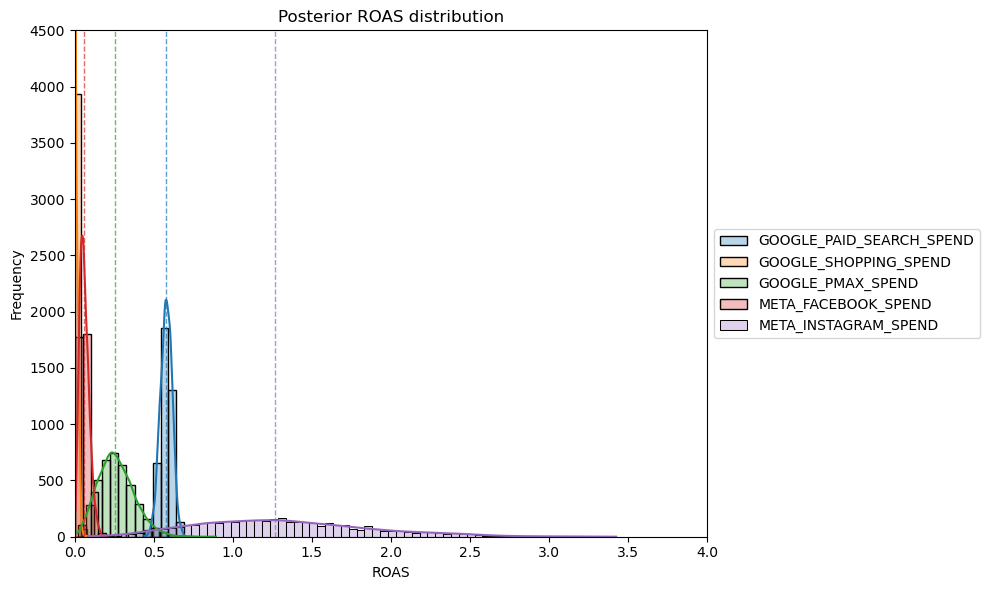

In [57]:
# Calculate ROAS samples using optimized code
channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()

# Sum over date dimension and calculate ROAS
roas_samples = (
    channel_contribution_original_scale.stack(sample=("chain", "draw")).sum("date")
    / df_train[spend_vars].sum().to_numpy()[..., None]
)

# Create histogram plot
fig, ax = plt.subplots(figsize=(10, 6))

for channel in spend_vars:
    data = roas_samples.sel(channel=channel).to_numpy()
    
    # Filter out NaN values
    data = data[~np.isnan(data)]
    
    # Plot histogram
    sns.histplot(data, label=channel, binwidth=0.05, alpha=0.3, kde=True, ax=ax)
    
    # Calculate and display mean for each channel
    median_value = np.median(data)
    ax.axvline(median_value, linestyle='dashed', color=sns.color_palette()[spend_vars.index(channel)], alpha=0.7, linewidth=1)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4500)  # Set y-axis limit to 5000
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Posterior ROAS distribution", xlabel="ROAS", ylabel="Frequency")

plt.tight_layout()
plt.show()


In [58]:
#let's get one number for ROAS for each channel
roas_samples.median(dim='sample').to_dataframe(name='median_ROAS').sort_values(by='median_ROAS',ascending=False)

median_ROAS
channel                              
META_INSTAGRAM_SPEND         1.265937
GOOGLE_PAID_SEARCH_SPEND     0.579078
GOOGLE_PMAX_SPEND            0.252511
META_FACEBOOK_SPEND          0.056111
GOOGLE_SHOPPING_SPEND        0.004155

# Model Validation (Hold-Out Testing)

In [59]:
# Generate predictions on the test set

y_test_pred = mmm.sample_posterior_predictive(X_pred=df_test.reset_index(), extend_idata=True, 
                                              include_last_observations=True)
y_test_pred

Sampling: [y]


<xarray.Dataset> Size: 2MB
Dimensions:  (date: 44, sample: 4000)
Coordinates:
  * date     (date) datetime64[ns] 352B 2023-05-07 2023-05-14 ... 2024-03-03
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    y        (date, sample) float64 1MB 4.512e+03 8.327e+03 ... 3.307e+03
Attributes:
    created_at:                 2024-04-23T04:19:21.323493
    arviz_version:              0.17.1
    inference_library:          pymc
    inference_library_version:  5.12.0

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_85253/481529927.py:15: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  X_out_of_sample[date_var].dt.to_pydatetime(),


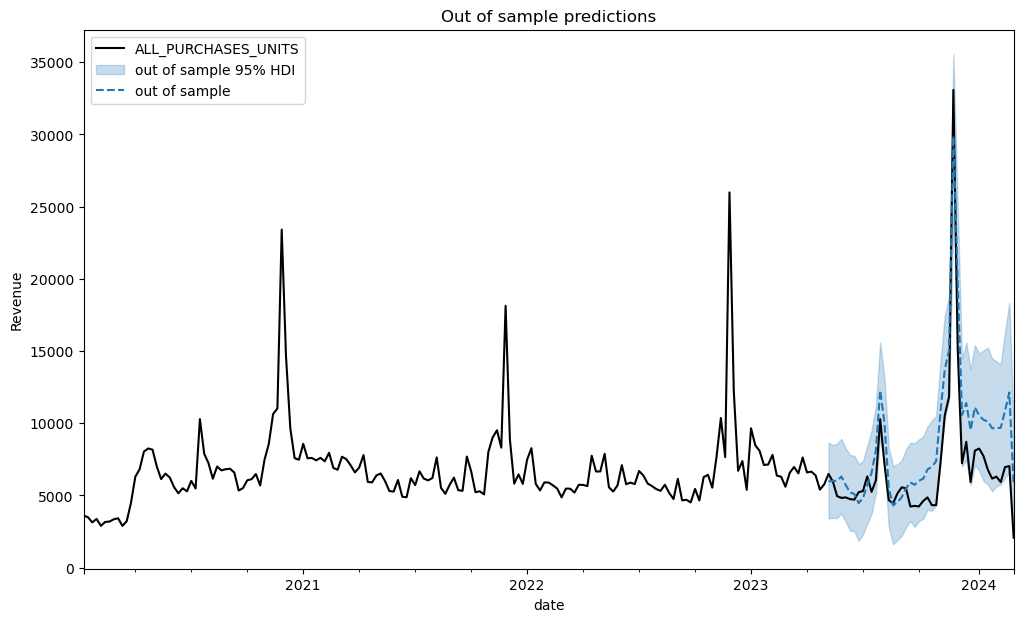

In [60]:
def plot_in_sample(X, y, ax, n_points: int=0):
    (
        y.to_frame()
        .set_index(X[date_var])
        .iloc[-n_points:]
        .plot(ax=ax, color="black", label="actuals")
    )
    
def plot_out_of_sample(X_out_of_sample, y_out_of_sample, ax, color, label): 
    y_out_of_sample_groupby = y_out_of_sample["y"].to_series().groupby('date')
    
    lower, upper = quantiles = [0.025, 0.975]
    conf = y_out_of_sample_groupby.quantile(quantiles).unstack()
    ax.fill_between(
        X_out_of_sample[date_var].dt.to_pydatetime(), 
        conf[lower], 
        conf[upper], 
        alpha=0.25, 
        color=color, 
        label=f"{label} 95% HDI", 
    )
    
    mean = y_out_of_sample_groupby.mean()
    mean.plot(ax=ax, label=label, color=color, linestyle="--")
    ax.set(
        ylabel="Revenue", 
        title="Out of sample predictions"
    )

    return ax

fig, ax = plt.subplots(figsize=(12,7))
plot_in_sample(df2.drop(kpi, axis=1).reset_index(), df2[kpi], n_points=365, ax=ax)
plot_out_of_sample(df_test.reset_index(), y_test_pred, ax=ax, label="out of sample", color="C0")
ax.legend();
plt.show()

In [61]:
#Check the r2 using the mean of the y_test_pred posterior

y_test_pred_mean = y_test_pred['y'].mean(dim='sample').values

mape = mean_absolute_percentage_error(y_test, y_test_pred_mean)

print('Mean Absolute Percentage Error: ', mape)

Mean Absolute Percentage Error:  0.3456414017340388


### Model Summary
1. The model is able to trace its path throughout the timeseries with an R2 score of ~0.8 and an MAPE of 0.14 suggesting it is a good fit. Even when a hold-out test was conducted the MAPE was ~0.34.
2. This also tells us that the control variable worked in our favor where it helped the model understand how to deal with sudden peaks.
3. Google Paid Search had the maximum contribution even though it constituted small amount of budget allocated to it. Google Shopping had the maximum budget allocated but it's contribution was very less. This implies that bigger spending doesn’t always equate to higher success, a point underscored by the spikes that might reflect effective campaigns or seasonal influences. There are notable spikes in revenue contribution, which may indicate successful campaigns or seasonal effects.
4. Google PMAX and Meta Instagram have distributions indicating a higher ROAS compared to other channels, while Google Paid Search appears to have the lowest.

Pondering on these insights raises the question: "Should the current budget distribution continue unchanged, or is there room for optimization to enhance outcomes?"

# Budget Optimization and Allocation

In [62]:
total_budget = 3 # we are assuming that 3M GBP has been alloted to the marketing team

# initial split per channel
budget_per_channel = total_budget / n_channels

# initial budget per channel as dictionary
initial_budget_dict = {channel: budget_per_channel for channel in spend_vars}

# bounds for each channel - minimum 1k, maximum 750k
min_budget, max_budget = .001, 0.75 
budget_bounds = {channel: [min_budget, max_budget] for channel in spend_vars}

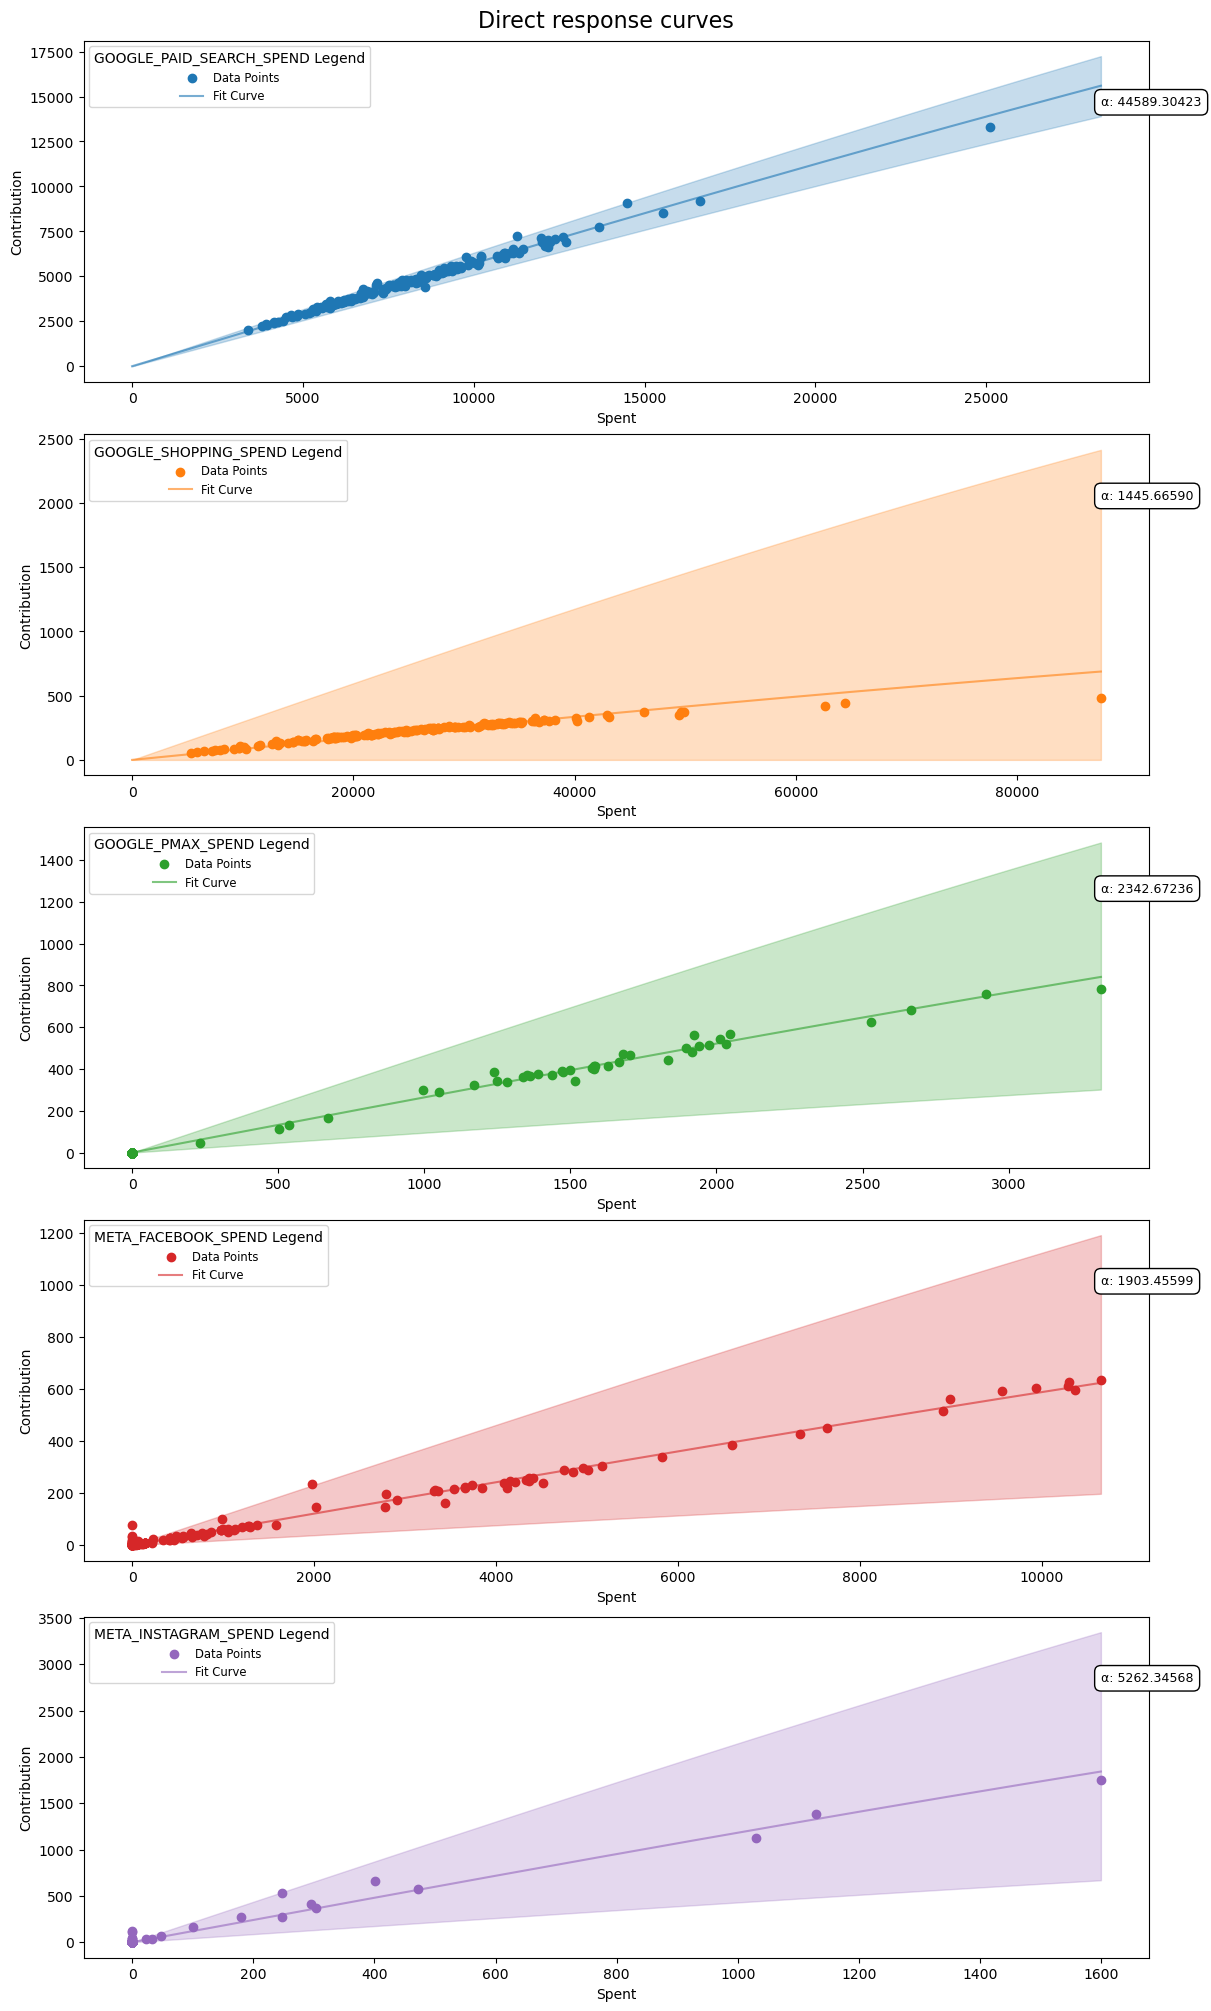

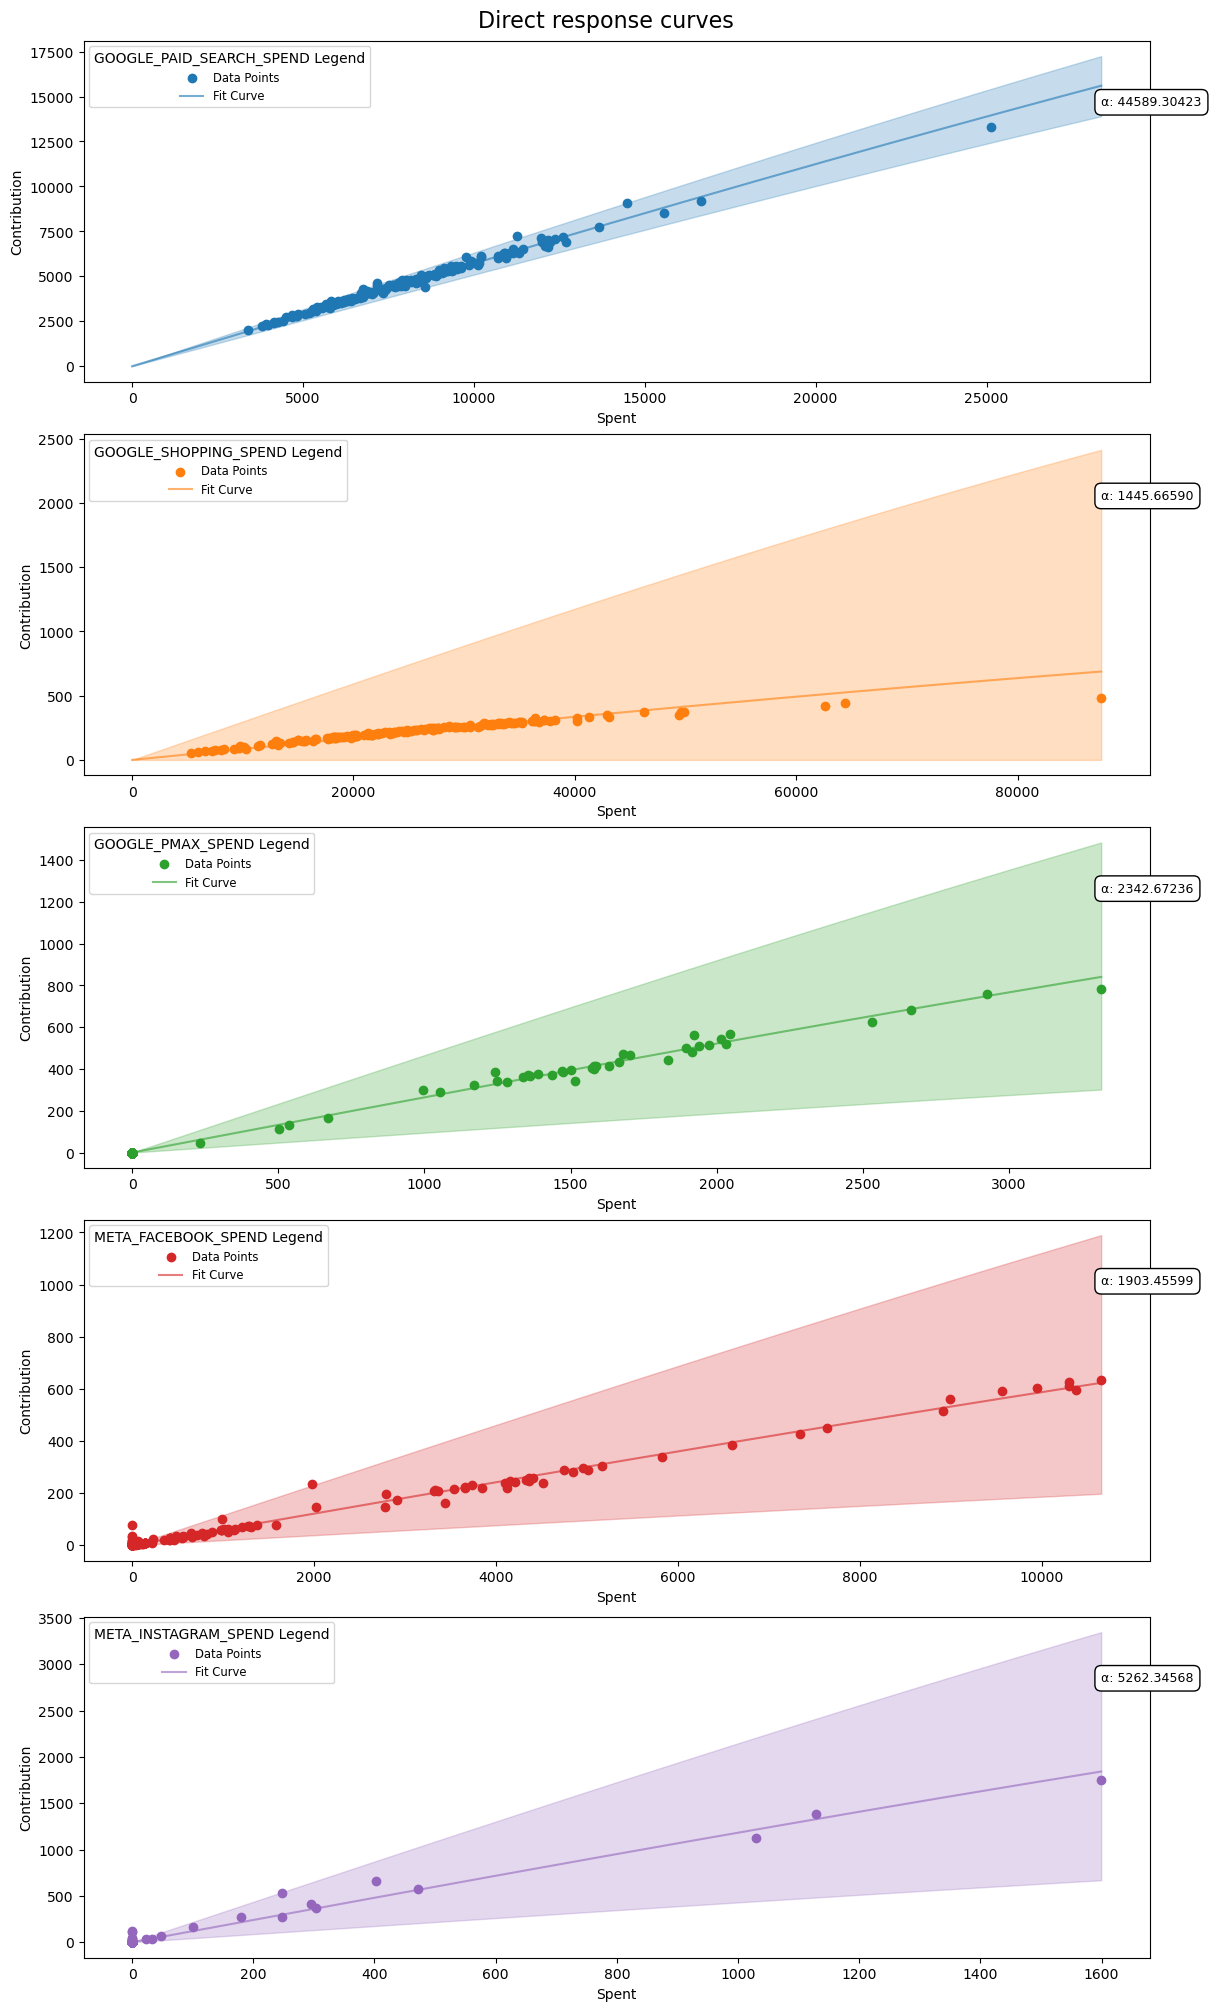

In [63]:
mmm.plot_direct_contribution_curves(show_fit=True)

For Google Paid Search, there is a clear positive trend, indicating a strong and consistent increase in revenue with increased spend. Google Shopping Spend, however, shows a more subdued response, suggesting a lower return as spending rises. Google PMAX and Meta Facebook exhibit modest positive trends, with PMAX displaying a steeper slope, hinting at better efficiency. Finally, Meta Instagram shows a promising growth in revenue contribution with higher spends, though starting from a smaller base. These curves aid in understanding how additional spending might translate into revenue across different channels and can guide budget allocation decisions.

In [64]:
# calculating parameters for sigmoid function
# sigmoid function is being considered becaause we
# expect a process to have a slow start, rapid growth in the middle, 
# and then a slow approach to an upper asymptote.
sigmoid_params = mmm.compute_channel_curve_optimization_parameters_original_scale(method='sigmoid')

/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/pymc_marketing/mmm/base.py:928: UserWarning: The curve optimization parameters method is experimental
  warnings.warn(


In [65]:
result_sigmoid = mmm.optimize_channel_budget_for_maximum_contribution(
    method = 'sigmoid', #define saturation function
    total_budget = total_budget,
    parameters = sigmoid_params,
    budget_bounds = budget_bounds
)

result_sigmoid

/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/pymc_marketing/mmm/base.py:898: UserWarning: This budget allocator method is experimental
  warnings.warn("This budget allocator method is experimental", UserWarning)


estimated_contribution  optimal_budget
GOOGLE_PAID_SEARCH_SPEND                0.430893           0.750
GOOGLE_SHOPPING_SPEND                   0.000009           0.001
GOOGLE_PMAX_SPEND                       0.199102           0.750
META_FACEBOOK_SPEND                     0.045500           0.749
META_INSTAGRAM_SPEND                    0.901644           0.750
total                                   1.577148           3.000

In [66]:
df2[spend_vars].groupby(df2['year']==2023).sum()

GOOGLE_PAID_SEARCH_SPEND  GOOGLE_SHOPPING_SPEND  GOOGLE_PMAX_SPEND  META_FACEBOOK_SPEND  META_INSTAGRAM_SPEND
year                                                                                                                
False              1.321846e+06           3.996313e+06      203870.692971        244637.886723           6086.042038
True               3.572027e+05           1.938896e+06      261744.145859         21770.460000           6566.470000

Allocating a significantly larger budget to a segment that hasn't previously experienced spend beyond GBP 30,000 would be imprudent. It's more judicious to incrementally increase the budget to discern its efficacy.

In [67]:
budget_bounds['GOOGLE_PAID_SEARCH_SPEND'] = [.5, .8]
budget_bounds['GOOGLE_SHOPPING_SPEND'] = [0.3, 0.5]
budget_bounds['GOOGLE_PMAX_SPEND'] = [.25, .5]
budget_bounds['META_FACEBOOK_SPEND'] = [.02, .03]
budget_bounds['META_INSTAGRAM_SPEND'] = [.01, 0.05]

budget_bounds

{'GOOGLE_PAID_SEARCH_SPEND': [0.5, 0.8],
 'GOOGLE_SHOPPING_SPEND': [0.3, 0.5],
 'GOOGLE_PMAX_SPEND': [0.25, 0.5],
 'META_FACEBOOK_SPEND': [0.02, 0.03],
 'META_INSTAGRAM_SPEND': [0.01, 0.05]}

In [68]:
result_sigmoid = mmm.optimize_channel_budget_for_maximum_contribution(
    method = 'sigmoid', #define saturation function
    total_budget = total_budget,
    parameters = sigmoid_params,
    budget_bounds = budget_bounds
)

result_sigmoid.sort_values(by='estimated_contribution', ascending = False)

/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/pymc_marketing/mmm/base.py:898: UserWarning: This budget allocator method is experimental
  warnings.warn("This budget allocator method is experimental", UserWarning)


estimated_contribution  optimal_budget
total                                   0.658560            1.88
GOOGLE_PAID_SEARCH_SPEND                0.459620            0.80
GOOGLE_PMAX_SPEND                       0.132735            0.50
META_INSTAGRAM_SPEND                    0.060110            0.05
GOOGLE_SHOPPING_SPEND                   0.004274            0.50
META_FACEBOOK_SPEND                     0.001822            0.03

In [69]:
# use the function `calculate_expected_contribution` to estimate
# the contribution of your initial budget based on the curve parameters.
from pymc_marketing.mmm.budget_optimizer import calculate_expected_contribution

initial_contribution = calculate_expected_contribution(
    method='sigmoid',
    parameters = sigmoid_params,
    budget = initial_budget_dict
)

# initial budget & contribution dictionary
initial_scenario = {
    'initial_contribution': initial_contribution,
    'initial_budget': initial_budget_dict
}

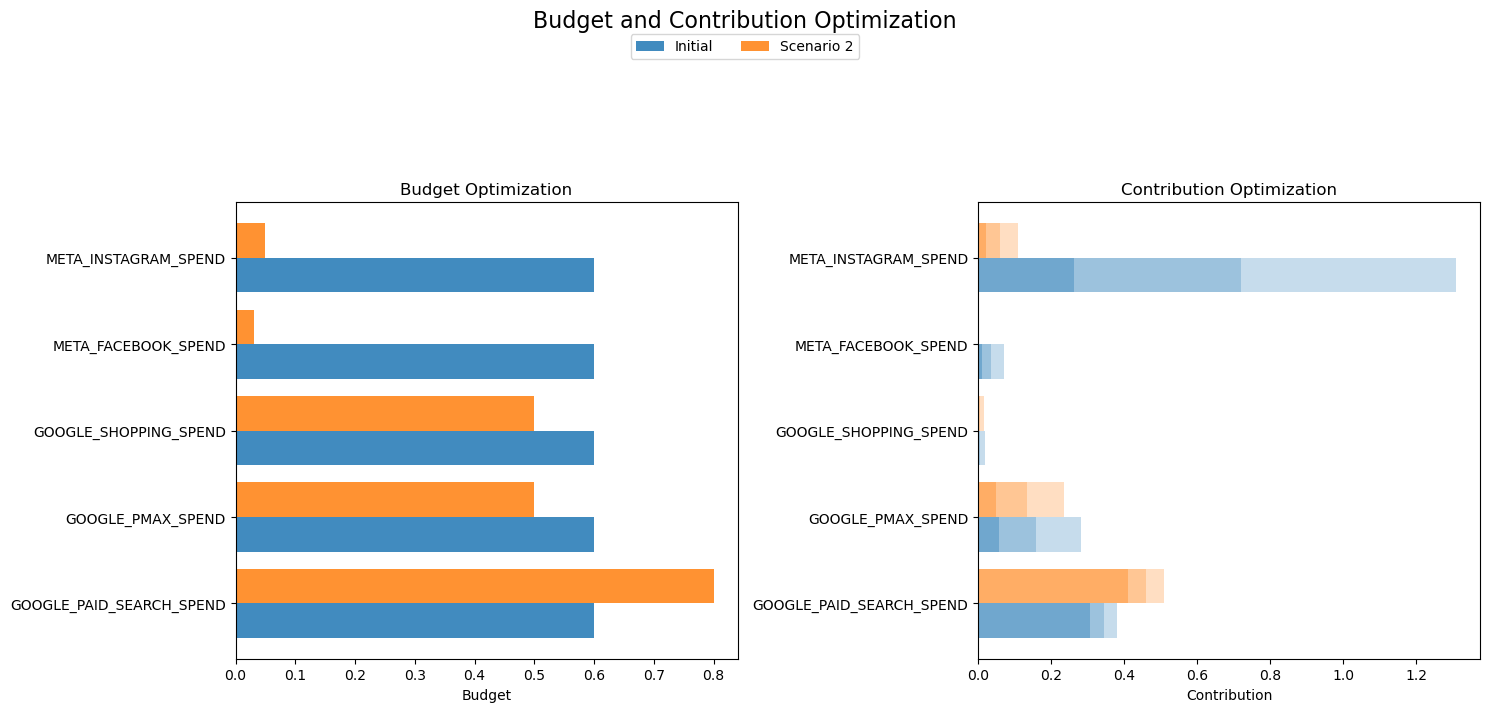

In [70]:
figure_ = mmm.plot_budget_scenearios(base_data=initial_scenario, method='sigmoid', scenarios_data=[result_sigmoid])

The plot compares initial and optimized scenarios for budget allocation and the resulting contribution by advertising channel. In the "Budget Optimization" panel, we see changes in budget distribution among the channels between the initial and Scenario 2 states, indicating a strategic shift in spending. The "Contribution Optimization" panel shows the impact of these budget changes on the contribution of each channel.

Notably, it appears that in Scenario 2, there's a recommendation to decrease the budget for Google Shopping Spend, which initially had a larger allocation, and increase the budget for channels like Meta Instagram Spend. This reallocation is reflected in the increased contribution from Meta Instagram Spend in Scenario 2, suggesting that the optimization is expected to yield a better return from this channel compared to the initial state.